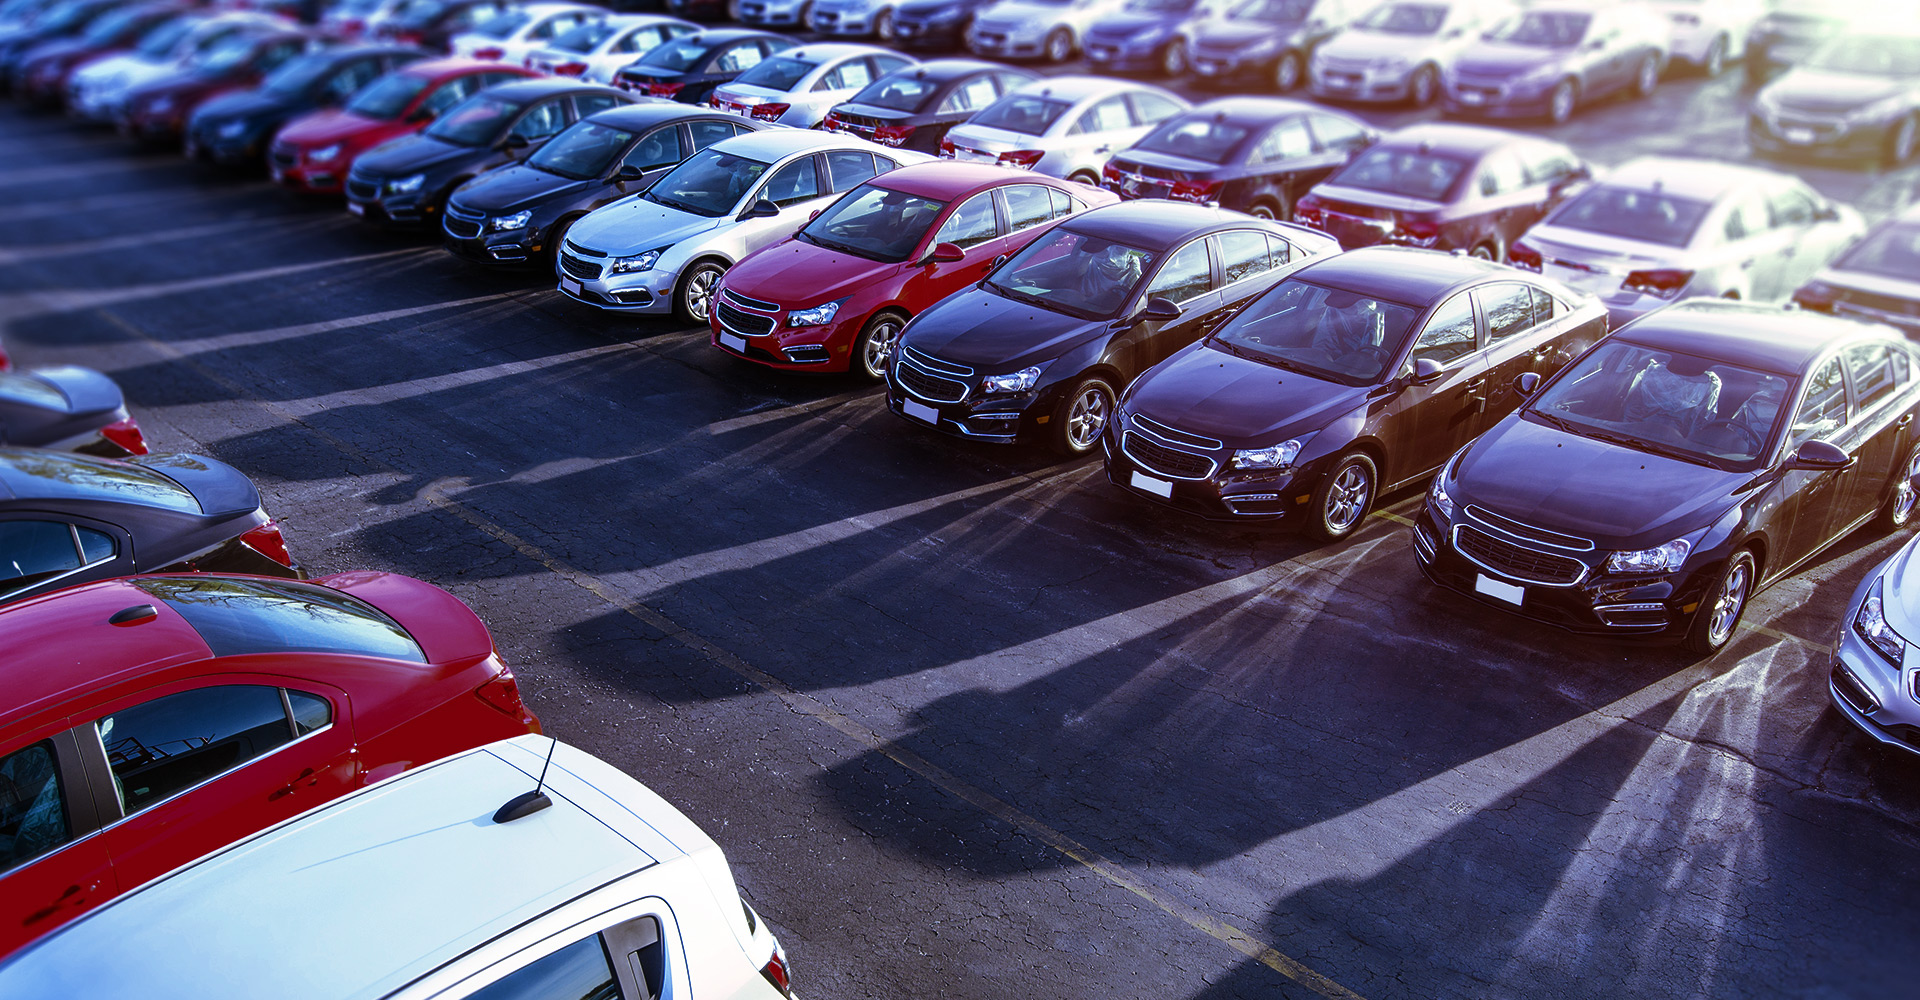

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:120%; text-align:left">
    
<h3 align="left"><font color=#ff8c00>Problem:</font></h3>

<h8 align="left"><font color=#105b7a>In this project, we have been provided with data for several cars along with their prices, and we have been asked to be able to predict the prices of new cars using machine learning models.</font></h8>


<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff8c00>Table of Contents:</font></h3>

* **[Step 1 | Import Libraries](#import)**
* **[Step 2 | Read Dataset](#read)**
* **[Step 3 | Dataset Overview](#overview)**
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#Numerical_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#can_statistics)
* **[Step 4 | EDA](#eda)**
    - [Step 4.1 | Univariate Analysis](#univariate)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
    - [Step 4.3 | Multivariate Analysis](#multivariate)
* **[Step 5 | Data Preprocessing](#preprocessing)**
    - [Step 5.1 | Irrelevant Features Removal](#removal)
    - [Step 5.2 | Outlier Treatment](#Outlier)
    - [Step 5.3 | Missing Value Treatment](#missing)
    - [Step 5.4 | Duplicate data Treatment](#duplicate)
* **[Step 6 | Functions required for modeling](#required)**
    - [Step 6.1 | Evaluation metrics](#Evaluation)    
    - [Step 6.2 | Evaluation By cross-validation](#cross)        
    - [Step 6.3 | Regression assumptions](#assumptions) 
    - [Step 6.4 | Linearity](#Linearity) 
    - [Step 6.5 | Normality of Residuals](#Normality) 
    - [Step 6.6 | No Multicollinearity](#Multicollinearity) 
    - [Step 6.7 | No Autocorrelation of Residuals](#Autocorrelation) 
    - [Step 6.8 | Homoscedasticity](#Homoscedasticity) 
    - [Step 6.9 | Results Visualization](#Results) 
    
* **[Step 7 | Linear Regression Building](#Linear)**
    - [Step 7.1 | Scale Data using Standard Scaler](#scaler_Linear) 
    - [Step 7.2 | LinearRegression Evaluation](#evaluation_linear)
    - [Step 7.3 | LinearRegression assumption](#assumption_Linear)  
    - [Step 7.4 | Results Visualization](#Results_linear)  
* **[Step 8 | Apply Box-Cox Transformation](#Box)**
    - [Step 8.1 | Transform Training Data & Save Lambda Values](#Lambda) 
    - [Step 8.2 | Transform Test Data Using Lambda Values](#Test)
* **[Step 9 | Build 2nd-order Polynomial Regression](#Polynomial)**
    - [Step 9.1 | Create 2nd-order Polynomial Features](#2nd_Polynomial) 
    - [Step 9.2 | Scale Data using Standard Scaler](#scaler_poly) 
    - [Step 9.3 | Polynomial Regression Evaluation](#evaluation_Polynomial)  
    - [Step 9.4 | Polynomial Regression assumption](#assumption_Polynomial)    
    - [Step 9.5 | Results Visualization](#Results_Polynomial) 
* **[Step 10 | Build Ridge Regression Model](#Ridge)** 
    - [Step 10.1 | Scale Data using Standard Scaler](#scaler_Ridge) 
    - [Step 10.2 | Ridge Regression Evaluation](#evaluation_Ridge)  
    - [Step 10.3 | Ridge Regression assumption](#assumption_Ridge)    
    - [Step 10.4 | Results Visualization](#Results_Ridge)
* **[Step 11 | Build Lasso Regression](#Lasso)**
    - [Step 11.1 | Lasso Regression Evaluation](#evaluation_Lasso)  
    - [Step 11.2 | Lasso Regression assumption](#assumption_Lasso)    
    - [Step 11.3 | Results Visualization](#Results_Lasso)
* **[Step 12 | Build Elastic_net Regression](#Elastic)** 
    - [Step 12.1 | Elastic_net Regression Evaluation](#evaluation_Elastic)  
    - [Step 12.2 | Elastic_net Regression assumption](#assumption_Elastic)    
    - [Step 12.3 | Results Visualization](#Results_Elastic)
* **[Step 13 | Building models with higher orders](#higher)**
* **[Step 14 | Final Regression model Building](#Final)**
    - [Step 14.1 | Drop Features with High Values of VIF](#VIF_Final) 
    - [Step 14.2 | Scale Data using Standard Scaler](#Scale_Final) 
    - [Step 14.3 | Final (ElasticNet**3) Regression model Evaluation](#Evaluation_Final)  
    - [Step 14.4 | Final Regression assumption](#assumption_Final)    
    - [Step 14.5 | Results Visualization](#Results_Final)

<a id="import"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 1: Import Libraries</p>

⬆️[Tabel of Contents](#contents_tabel)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split , StratifiedKFold ,KFold,cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.special import inv_boxcox

<a id="read"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 2: Read Dataset</p>

⬆️[Tabel of Contents](#contents_tabel)

In [2]:
data=pd.read_csv("D:/shinetech/cardata.csv")

In [3]:
data.head(5)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

<div style="background-color:#bdf0e6;border-radius:10px; ;padding:20px; font-size:15px">

|       | **Columns** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | Car_Name | Name of the cars |                
| **2** | Year | Year of the car when it was bought |                        
| **3** | Present_Price | Price at which the car is being sold |
| **4** | Kms_Driven | Number of kilometres the car is driven |
| **5** | Fuel_Type | Fuel type of car(petrol/diesel/CNG/LPG/electric) |                     
| **6** | Seller_Type | Tells if a Seller is Individual or a Dealer |
| **7** | Transmission | Gear Transmission of the car(Automatic/Manual) |              
| **8** | Owner | Number of previous owners of the car |                 
| **9** | **Selling_Price** | **Our Target** |

<a id="overview"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 3: Dataset Overview</p>

⬆️[Tabel of Contents](#contents_tabel)

<a id="basic"></a>
# <b><span style='color:darkorange'>Step 3.1 |</span><span style='color:black'> Dataset Basic Information</span></b>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>
    
* **Data:** The dataset contains **301** entries and **9 columns**. The columns consist of various data types, including **object (string)**, **integer**, and **float.**

* **Missing Values:** There are no missing values in this dataset.

<a id="Numerical_statistics"></a>
# <b><span style='color:darkorange'>Step 3.2 |</span><span style='color:black'> Summary Statistics for Numerical Variables</span></b>

In [5]:
data.describe(include='number')

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

<a id="Object_statistics"></a>
# <b><span style='color:darkorange'>Step 3.3 |</span><span style='color:black'> Summary Statistics for Object Variables</span></b>

In [6]:
data.describe(include='object')

Car_Name Fuel_Type Seller_Type Transmission
count       301       301         301          301
unique       98         3           2            2
top        city    Petrol      Dealer       Manual
freq         26       239         195          261

<a id="eda"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 4: Exploratory Data Analysis (EDA)</p>

⬆️[Tabel of Contents](#contents_tabel)

<a id="univariate"></a>
# <b><span style='color:darkorange'>Step 4.1 |</span><span style='color:black'> Univariate Analysiss</span></b>

- We perform univariate analysis separately for each categorical and continuous variable:

<a id="basic"></a>
# <b><span style='color:darkorange'>Step 4.1.1 |</span><span style='color:black'> Categorical Variables Univariate Analysis</span></b>

In [7]:
df_categorical=data[['Fuel_Type','Seller_Type','Transmission','Owner']]

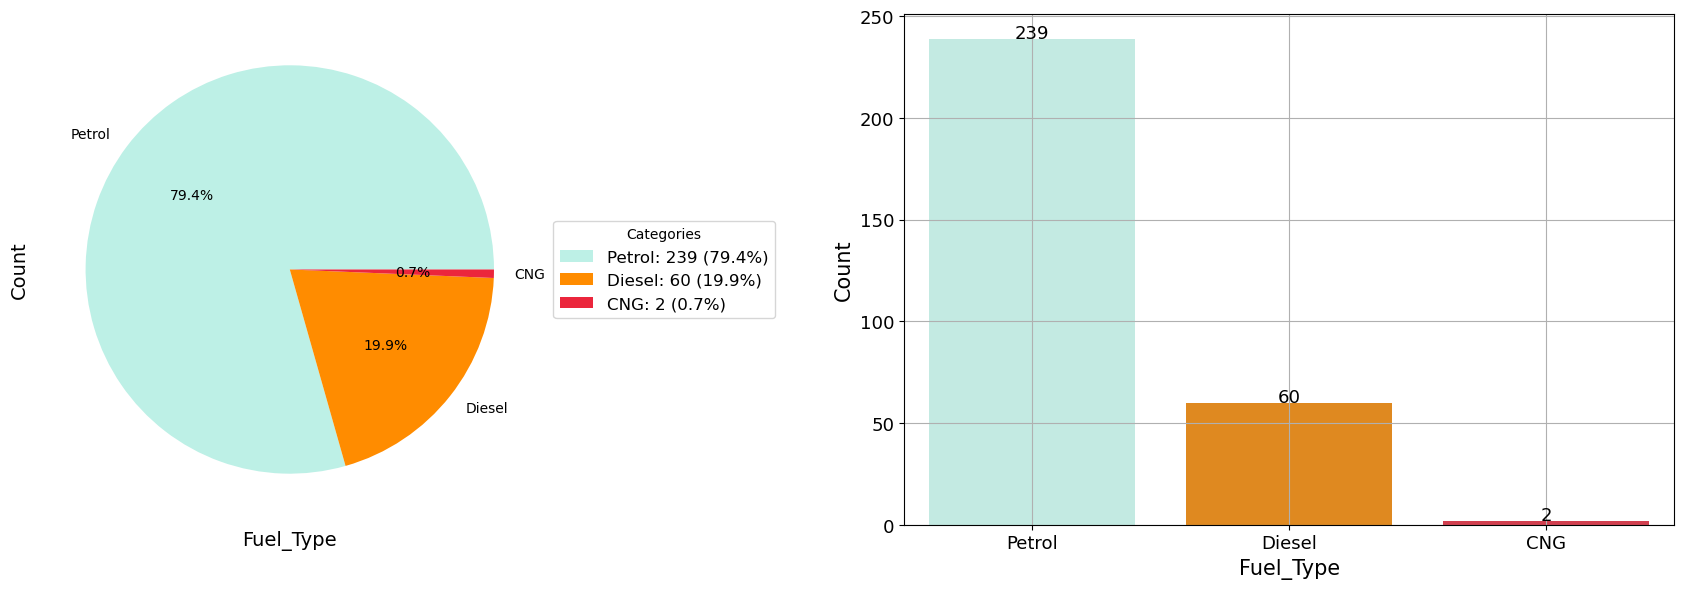

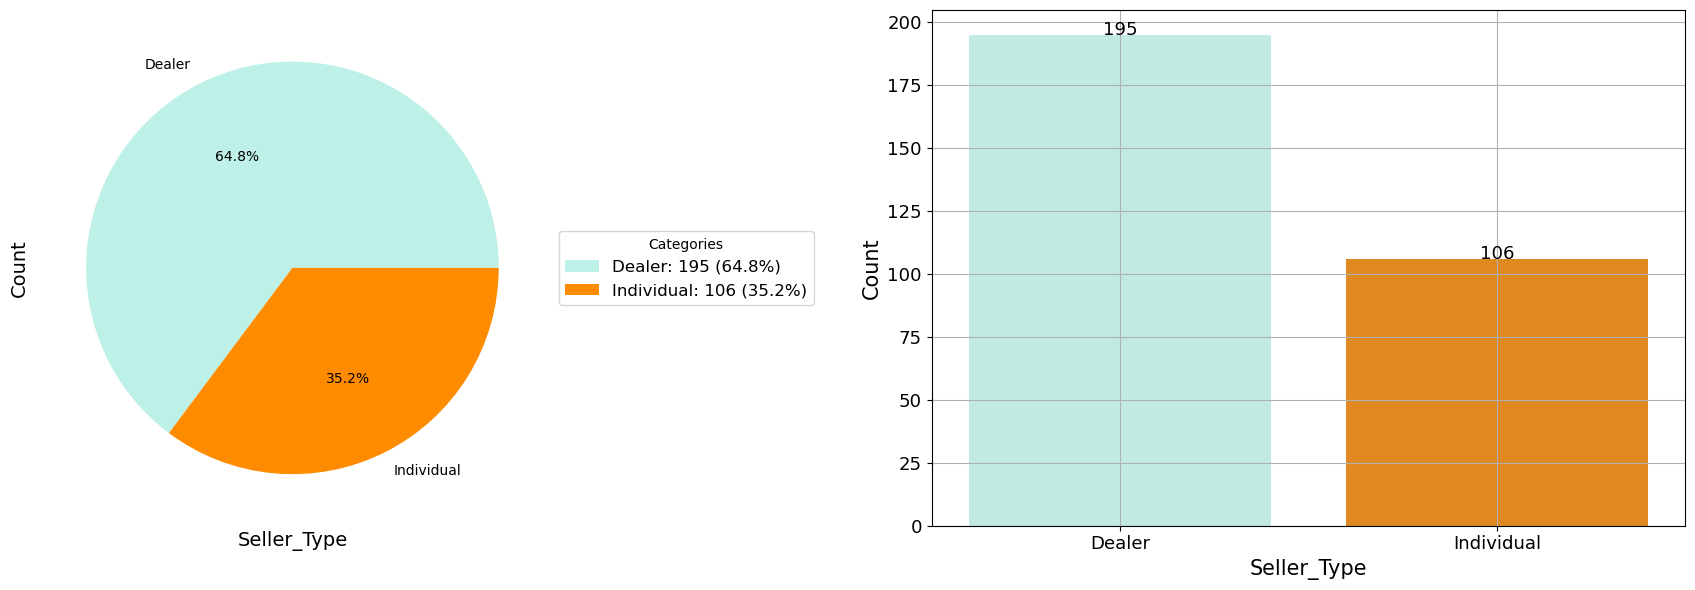

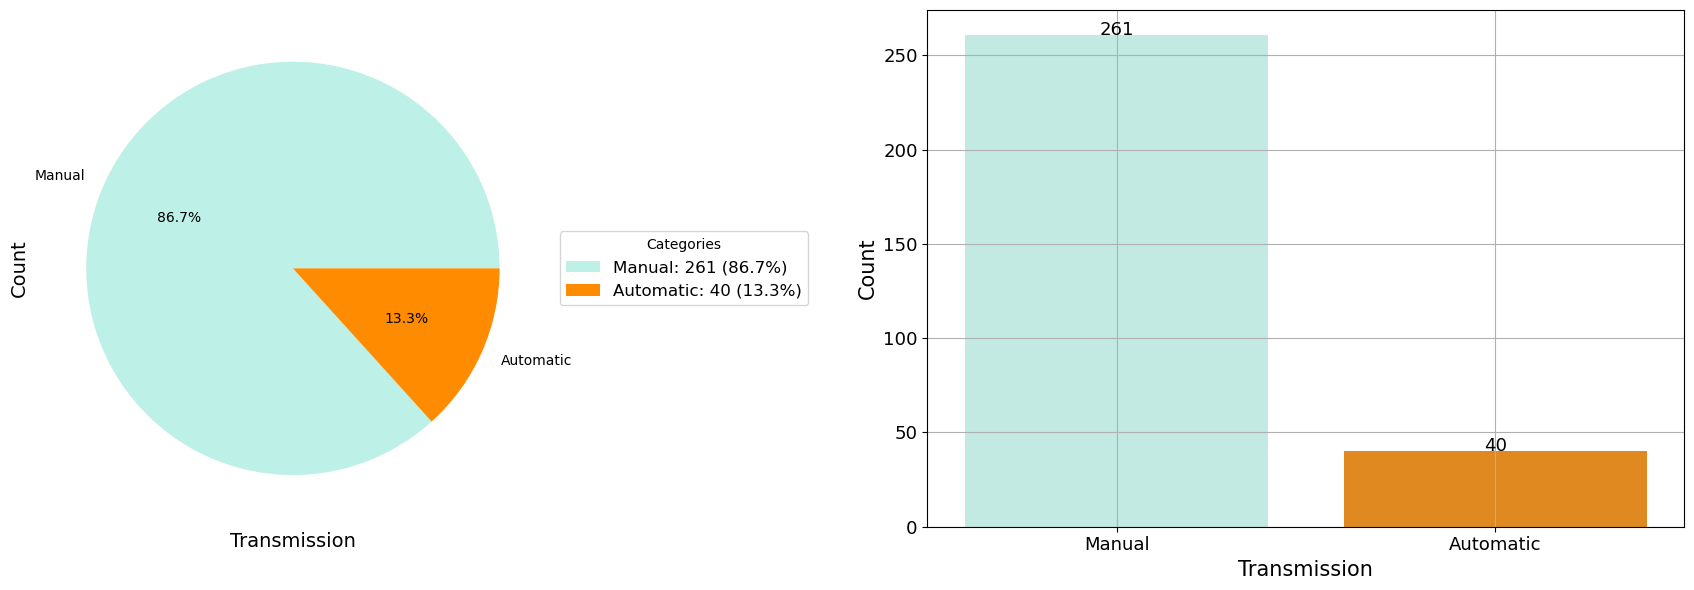

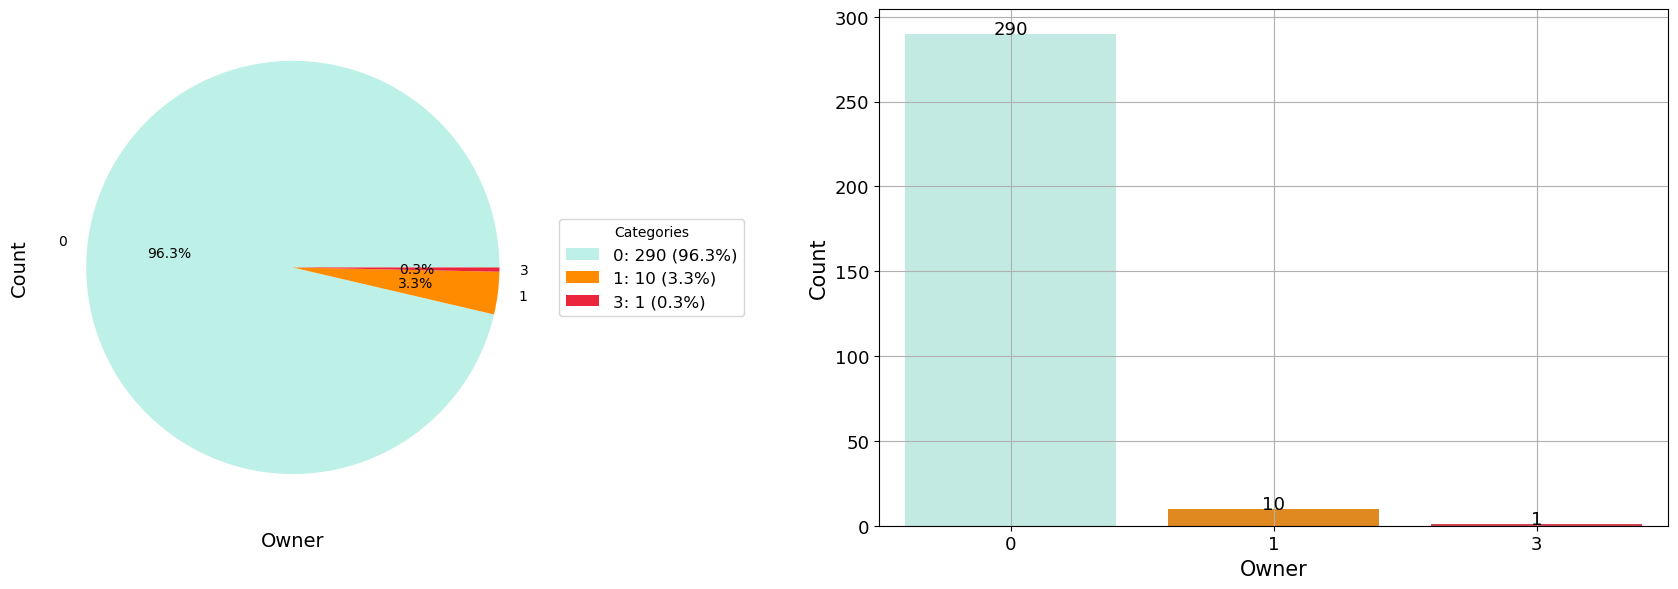

In [8]:
features = ['Fuel_Type','Seller_Type','Transmission','Owner']

for feature in features:
    counts = df_categorical[feature].value_counts()
    percentages = counts / counts.sum() * 100
    colors = ['#bdf0e6','#ff8c00', '#eb263c'] 
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    
    # Pie chart
    wedges, _, _ = ax1.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
    ax1.set_xlabel(feature, fontsize=14)
    ax1.set_ylabel('Count', fontsize=14)
    
    legend_labels = []
    for i, (count, percent) in enumerate(zip(counts, percentages)):
        label = f'{counts.index[i]}: {count} ({percent:.1f}%)'
        legend_labels.append(label)
    
    ax1.legend(wedges, legend_labels, title='Categories', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.setp(ax1.get_xticklabels(), fontsize=12)
    plt.setp(ax1.get_yticklabels(), fontsize=12)
    
    # Countplot
    ax2 = sns.countplot(x=feature, data=data, ax=ax2, palette=colors)
    ax2.set_xlabel(feature, fontsize=15)
    ax2.set_ylabel('Count', fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid()
    for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), ha='center', fontsize=13)
    
    plt.tight_layout()
    plt.show()

<a id="basic"></a>
# <b><span style='color:darkorange'>Step 4.1.2 |</span><span style='color:black'> Continuous Variables Univariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Note:**
   - We need to calculate the number of years a car has been in use from the **Year** column and replace the values in the **Year** column with these calculated values:

In [9]:
Ago=2018-data["Year"]
data.insert(0,"Ago",Ago)

In [10]:
data=data.drop('Year',axis=1)

In [11]:
df_continuous = ['Ago', 'Selling_Price', 'Present_Price', 'Kms_Driven']

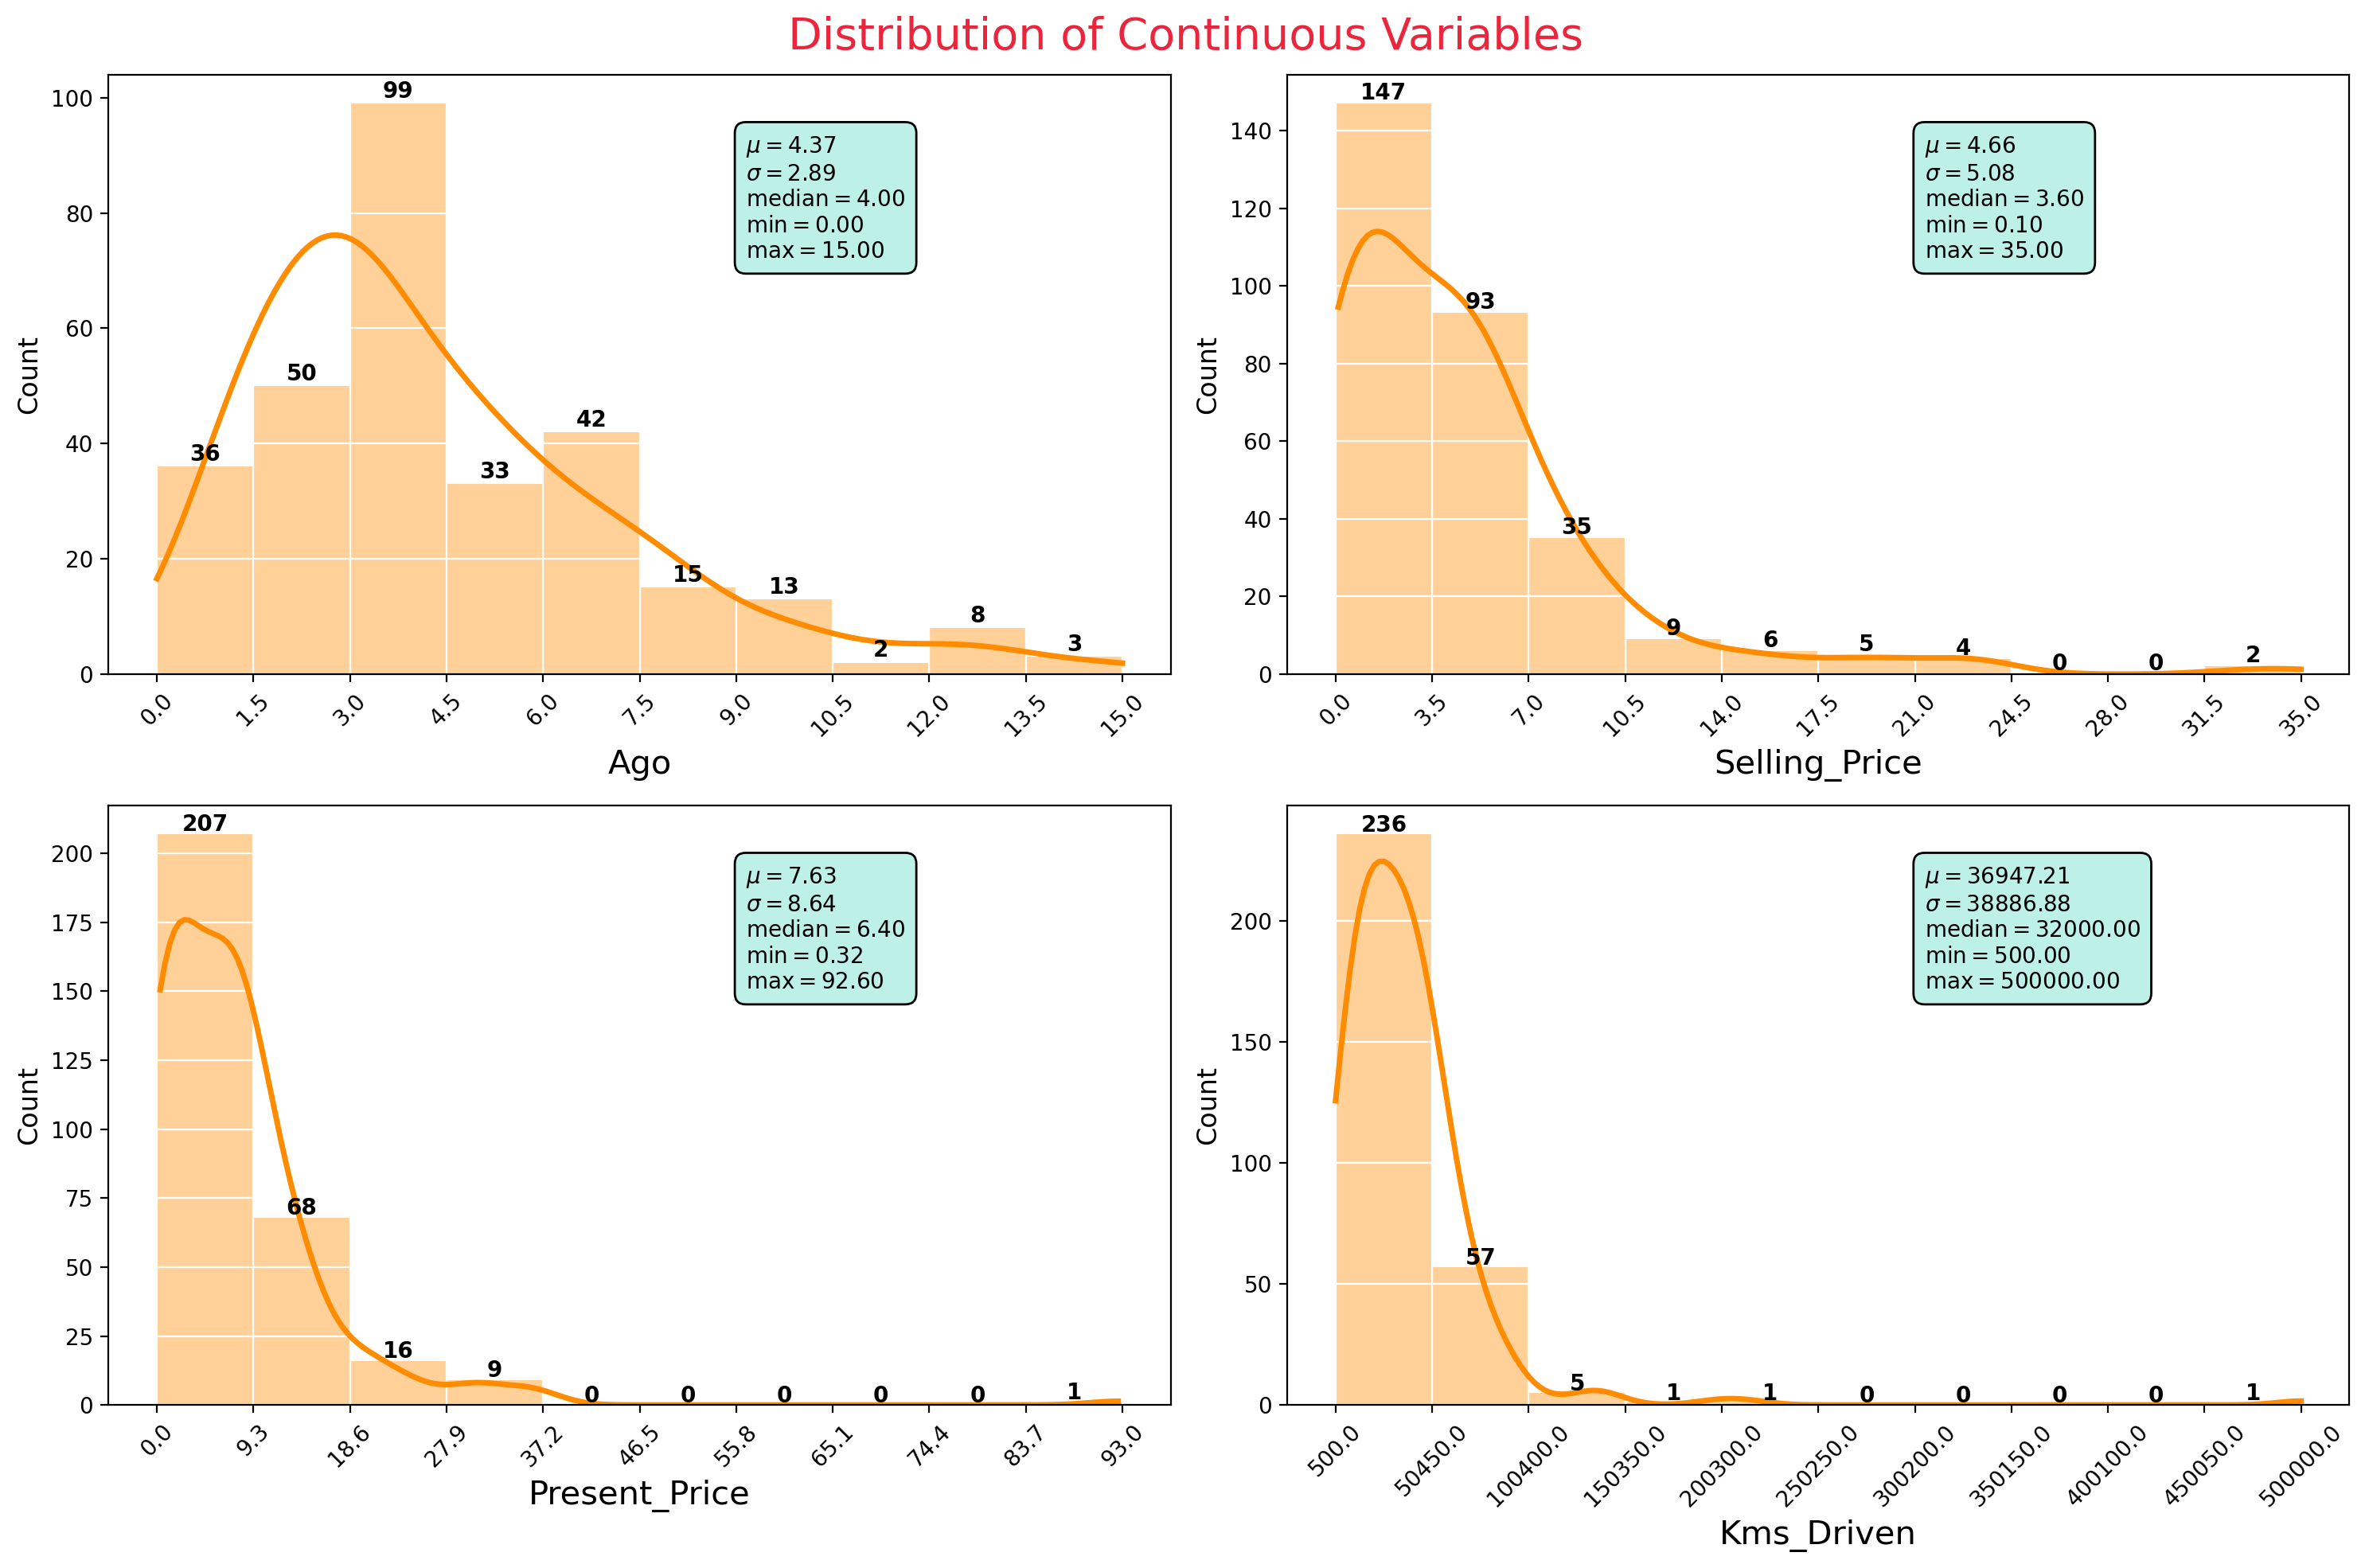

In [12]:
NumCols = ['Ago', 'Selling_Price', 'Present_Price', 'Kms_Driven']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10), dpi=200)

for i in range(len(NumCols)):
    row = i//2
    col = i%2
    values, bin_edges = np.histogram(data[NumCols[i]], 
                                     range=(np.floor(data[NumCols[i]].min()), np.ceil(data[NumCols[i]].max())))                
    graph = sns.histplot(data=data, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color='#ff8c00', alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(NumCols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='white')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")
    
    textstr = '\n'.join((
    r'$\mu=%.2f$' %data[NumCols[i]].mean(),
    r'$\sigma=%.2f$' %data[NumCols[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(data[NumCols[i]]),
    r'$\mathrm{min}=%.2f$' %data[NumCols[i]].min(),
    r'$\mathrm{max}=%.2f$' %data[NumCols[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#bdf0e6', edgecolor='black', pad=0.5))

plt.suptitle('Distribution of Continuous Variables', fontsize=20,color='#eb263c') 
plt.tight_layout()   
plt.show()

<a id="bivariate"></a>
# <b><span style='color:darkorange'>Step 4.2 |</span><span style='color:black'> Bivariate Analysis</span></b>

We perform bivariate analysis separately for each categorical and continuous variable:

<a id="basic"></a>
# <b><span style='color:darkorange'>Step 4.2.1 |</span><span style='color:black'> Categorical Variables Bivariate Analysis</span></b>

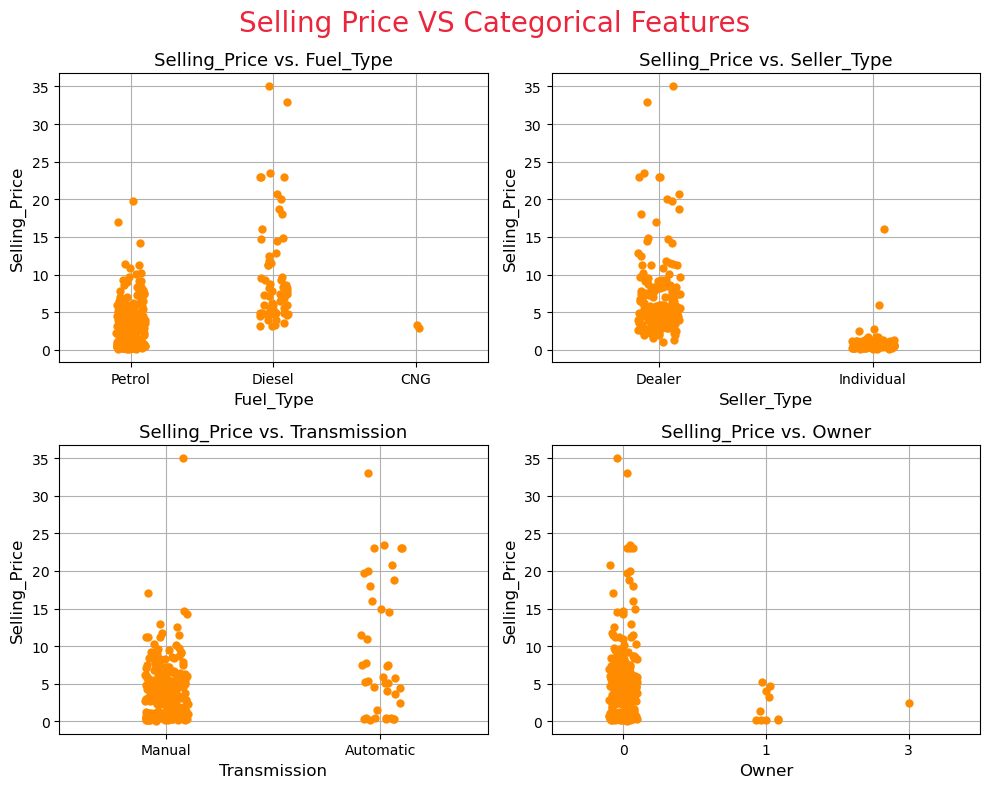

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), dpi=100)

cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

for i, feature in enumerate(cat_features):
    row = i // 2
    col = i % 2
    sns.stripplot(ax=axes[row, col], x=feature, y='Selling_Price', data=data, size=6, color='#ff8c00')
    axes[row, col].set_title('{} vs. {}'.format('Selling_Price', feature), size=13)
    axes[row, col].set_xlabel(feature, size=12)
    axes[row, col].set_ylabel('Selling_Price', size=12)
    axes[row, col].grid()

plt.suptitle('Selling Price VS Categorical Features', size=20,color='#eb263c')
plt.tight_layout()
plt.show()

<a id="basic"></a>
# <b><span style='color:darkorange'>Step 4.2.2 |</span><span style='color:black'> Continuous Variables Bivariate Analysis</span></b>

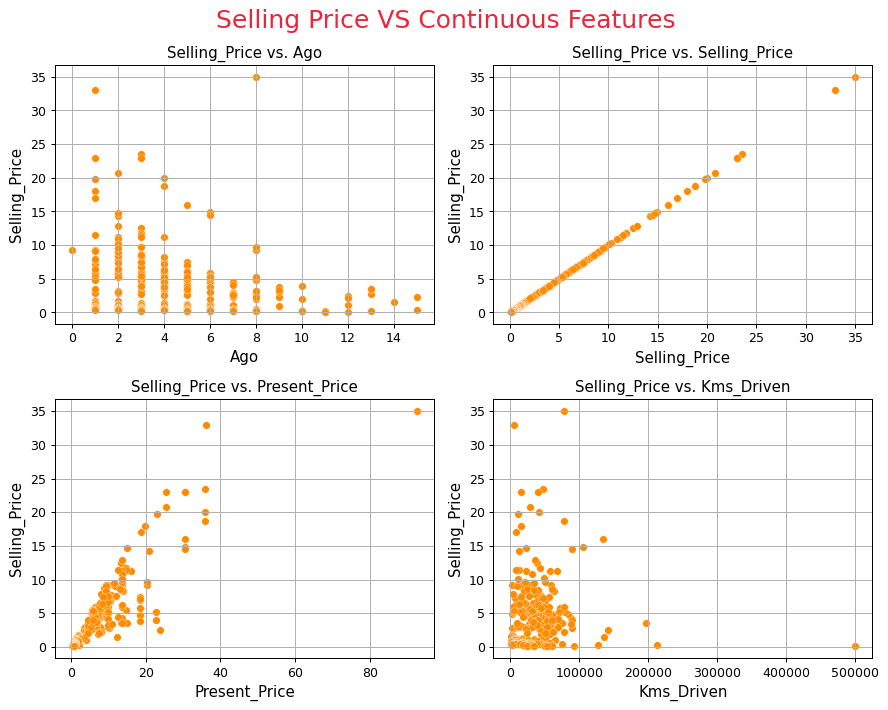

In [14]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,8), dpi=90)
num_features = ['Ago', 'Selling_Price', 'Present_Price', 'Kms_Driven']

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(data[num_features[i]], data['Selling_Price'], color='#ff8c00', edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format('Selling_Price', num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel('Selling_Price', size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price VS Continuous Features', size = 20,color='#eb263c')
plt.tight_layout()
plt.show()

<a id="Encoding"></a>
# <b><span style='color:darkorange'>Step 4.3 |</span><span style='color:black'> Categorical Variables Encoding</span></b>

In [15]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

data = pd.get_dummies(data, columns=CatCols, drop_first=True)
data.head(5)

Ago Car_Name  Selling_Price  Present_Price  Kms_Driven  Owner  \
0    4     ritz           3.35           5.59       27000      0   
1    5      sx4           4.75           9.54       43000      0   
2    1     ciaz           7.25           9.85        6900      0   
3    7  wagon r           2.85           4.15        5200      0   
4    4    swift           4.60           6.87       42450      0   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                 0                 1                       0   
1                 1                 0                       0   
2                 0                 1                       0   
3                 0                 1                       0   
4                 1                 0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

<a id="multivariate"></a>
# <b><span style='color:darkorange'>Step 4.4 |</span><span style='color:black'> Multivariate Analysis</span></b>

<Axes: >

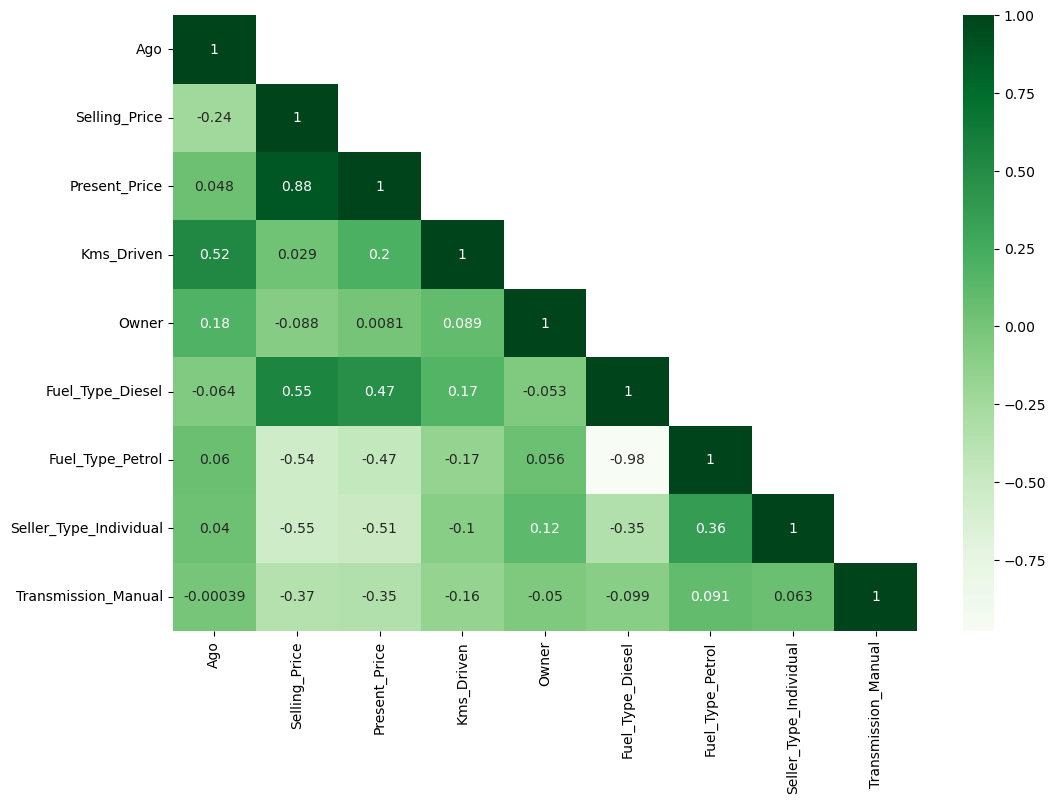

In [16]:
corr = data.corr(method="pearson")     
fig, ax = plt.subplots(figsize=(12, 8))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True
sns.heatmap(corr, cmap='Greens' , mask=mask ,annot=True, ax=ax)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

- Fuel_Type_Petrol & Fuel_Type_Diesel: 
    - **strong** correlation 
- Present_Price & Selling_Price: 
    - **strong** correlation 
- Fuel_Type_Diesel & Selling_Price: 
    - **moderate** correlation
- Fuel_Type_Diesel & Present_Price: 
    - **moderate** correlation
- Fuel_Type_Petrol & Present_Price: 
    - **moderate** correlation
- Fuel_Type_Petrol & Selling_Price: 
    - **moderate** correlation
- Kms_Driven & Ago: 
    - **moderate** correlation
- Seller_Type_Individual & Present_Price: 
    - **moderate** correlation
- Seller_Type_Individual & Selling_Price: 
    - **moderate** correlation
- Seller_Type_Individual & Selling_Price: 
    - **moderate** correlation
- Seller_Type_Individual & Selling_Price: 
    - **moderate** correlation

In [17]:
def Multivariate (z):
    g = sns.FacetGrid(data, col=z,hue=z, palette="Greens")
    g.map(sns.scatterplot, 'Selling_Price', 'Present_Price',s=50)
    g.set_axis_labels( x='Selling_Price', y='Present_Price' )
    plt.show()

<a id="basic"></a>
# <b><span style='color:darkorange'>Selling Price & Present Price & Owner 🔍

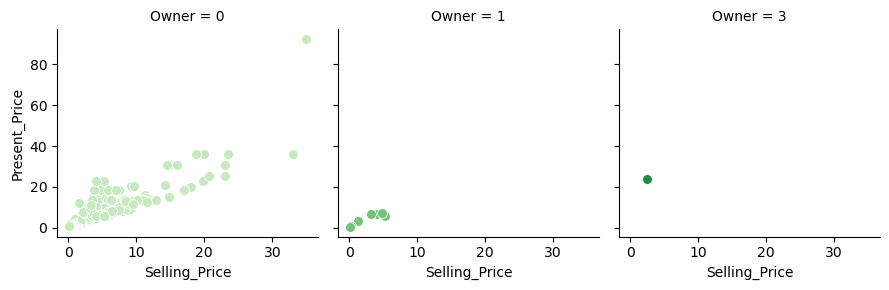

In [18]:
Multivariate ('Owner')

<a id="basic"></a>
# <b><span style='color:darkorange'>Selling Price & Present Price & Fuel_Type_Diesel 🔍

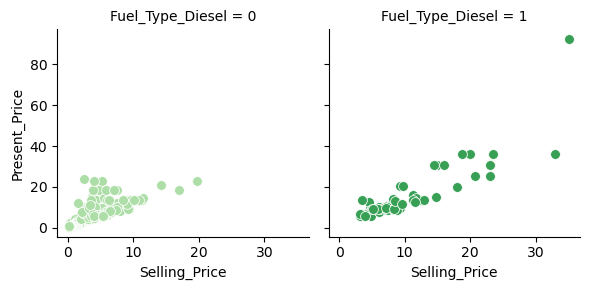

In [19]:
Multivariate ('Fuel_Type_Diesel')

<a id="basic"></a>
# <b><span style='color:darkorange'>Selling Price & Present Price & Transmission_Manual 🔍

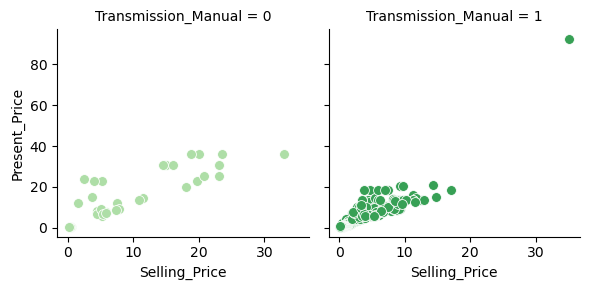

In [20]:
Multivariate ('Transmission_Manual')

<a id="preprocessing"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 5: Data Preprocessing</p>

⬆️[Tabel of Contents](#contents_tabel)

<a id="removal"></a>
# <b><span style='color:darkorange'>Step 5.1 |</span><span style='color:black'> Irrelevant Feature Removal</span></b>

In [21]:
data = data.drop(['Car_Name', 'Fuel_Type_Diesel'], axis=1)

In [22]:
data.head(5)

Ago  Selling_Price  Present_Price  Kms_Driven  Owner  Fuel_Type_Petrol  \
0    4           3.35           5.59       27000      0                 1   
1    5           4.75           9.54       43000      0                 0   
2    1           7.25           9.85        6900      0                 1   
3    7           2.85           4.15        5200      0                 1   
4    4           4.60           6.87       42450      0                 0   

   Seller_Type_Individual  Transmission_Manual  
0                       0                    1  
1                       0                    1  
2                       0                    1  
3                       0                    1  
4                       0                    1

<a id="Outlier"></a>
# <b><span style='color:darkorange'>Step 5.2 |</span><span style='color:black'> Outlier Treatment</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2> 
    
* I have **explained** in a comprehensive and detailed manner **how to detect and handle noise and outliers in a video**.
- **It would be my pleasure if you could grace my video with your insightful perspective**😊👌

🔍[Link](https://youtu.be/TRDHGN-a6Gs)👈

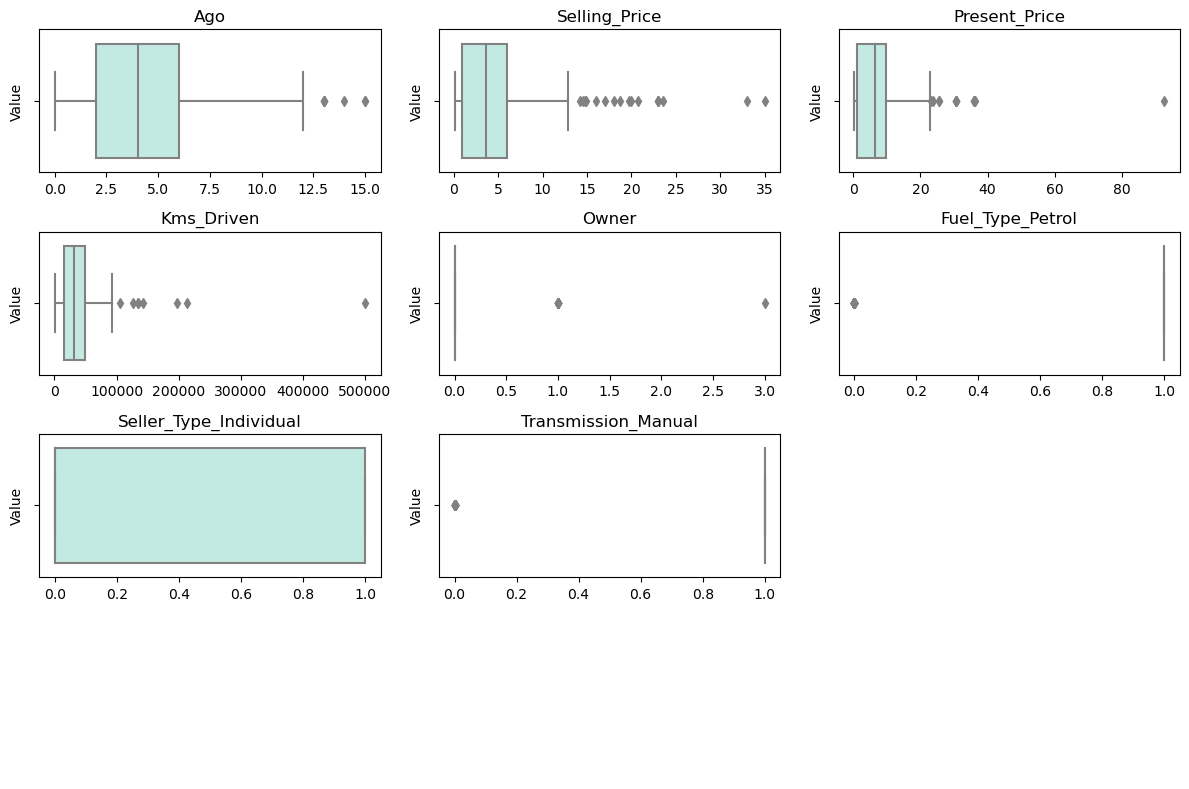

In [23]:
num_cols = 3
num_rows = 4
num_features = len(data.columns)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
feature_num = 0

for i in range(num_rows):
    for j in range(num_cols):
        if feature_num < num_features:
            sns.boxplot(x=data.iloc[:, feature_num], color='#bdf0e6', ax=axes[i, j])
            axes[i, j].set_title(data.columns[feature_num])
            axes[i, j].set_ylabel('Value')
            axes[i, j].set_xlabel('')
            feature_num += 1
        else:
            axes[i, j].axis('off') 

plt.tight_layout()  
plt.show() 

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2> 
    
* Outliers are exceptional values that deviate significantly from the rest of the data. They can pose challenges, especially in regression analysis, as they can have a considerable impact on the results.

* To address the influence of outliers, a **Box-Cox transformation** is utilized in the modeling stage. This approach adjusts the data to mitigate the extreme effects of outliers without entirely eliminating them.

In [24]:
indices = data[data['Owner'] == 3].index
print(indices)

Int64Index([85], dtype='int64')


In [25]:
data = data.drop(85)

<a id="missing"></a>
# <b><span style='color:darkorange'>Step 5.3 |</span><span style='color:black'> Missing Value Treatment</span></b>

In [26]:
data.isnull().sum()

Ago                       0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Note:** 
   - **We do not have any missing data in this dataset**

<a id="duplicate"></a>
# <b><span style='color:darkorange'>Step 5.4 |</span><span style='color:black'> Duplicate data Treatment</span></b>

In [27]:
duplicates=data.duplicated()
print(duplicates.sum())

2


In [28]:
df=data.drop_duplicates()

<a id="required"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 6: Functions required for modeling</p>

⬆️[Tabel of Contents](#contents_tabel)

<a id="Evaluation"></a>
# <b><span style='color:#ff8c00'>Step 6.1 |</span><span style='color:black'> Evaluation metrics</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Evaluation metrics:</font></h2>

* Here is a function I wrote that gives me evaluation metrics such as **MSE, RMSE, MAE, and R2_Score** from the built model

In [29]:
def model_evaluate(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    evaluation_df = pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE', 'R2-Score'], columns=[model_name])
    evaluation_df = evaluation_df.round(4)
    fig, ax = plt.subplots(figsize=(6, 2))
    result_table = ax.table(cellText=evaluation_df.values, colLabels=evaluation_df.columns, rowLabels=evaluation_df.index, loc='center')
    result_table.scale(0.3, 1.8)
    result_table.set_fontsize(12)
    ax.axis('tight')
    ax.axis('off')
    ax.set_title("Model evaluation")
    # Modify color
    for key, cell in result_table.get_celld().items():
        if key[0] == 0:
            cell.set_color('#bdf0e6')
        elif key[0] > 0:
            cell.set_color('#bdf0e6')
    plt.show()

<a id="cross"></a>
# <b><span style='color:#ff8c00'>Step 6.2 |</span><span style='color:black'> Evaluation metrics By using cross-validation:</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* By using cross-validation, we can have more confidence in our estimation for the model evaluation metrics than the former simple train test split:

In [30]:
def model_evaluate_cross(X, y, Model):
    linear_reg_cv = Model
    scaler = StandardScaler()
    pipeline = make_pipeline(StandardScaler(), Model)

    kf = KFold(n_splits=6, shuffle=True, random_state=0)
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    result = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

    MAE_mean = round((-result['test_neg_mean_absolute_error']).mean(), 4)
    MAE_std = round((-result['test_neg_mean_absolute_error']).std(), 4)
    MSE_mean = round((-result['test_neg_mean_squared_error']).mean(), 4)
    MSE_std = round((-result['test_neg_mean_squared_error']).std(), 4)
    RMSE_mean = round((-result['test_neg_root_mean_squared_error']).mean(), 4)
    RMSE_std = round((-result['test_neg_root_mean_squared_error']).std(), 4)
    R2_Score_mean = round(result['test_r2'].mean(), 4)
    R2_Score_std = round(result['test_r2'].std(), 4)

    df = pd.DataFrame({'Mean': [MAE_mean, MSE_mean, RMSE_mean, R2_Score_mean],
                       'Std': [MAE_std, MSE_std, RMSE_std, R2_Score_std]},
                      index=['MAE', 'MSE', 'RMSE', 'R2-Score'])

    # Plotting the table
    fig, ax = plt.subplots(figsize=(6, 2))
    result_table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center')
    result_table.scale(0.4, 1.7)
    result_table.set_fontsize(11)
    ax.axis('tight')
    ax.axis('off')
    ax.set_title("Model evaluation by cross-validation")
    # Modify color
    for key, cell in result_table.get_celld().items():
        if key[0] == 0:
            cell.set_color('#bdf0e6')
        elif key[0] > 0:
            cell.set_color('#bdf0e6')
    plt.show()

<a id="assumptions"></a>
# <b><span style='color:#ff8c00'>Step 6.3 |</span><span style='color:black'> Regression assumptions:</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* Regression algorithms are used to model relationships between variables. These algorithms are based on a set of assumptions that, if not met, can lead to invalid model results.

<a id="Linearity"></a>
# <b><span style='color:#ff8c00'>Step 6.4 |</span><span style='color:black'> First Assumption: Linearity</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **We need to check that the relationship between each feature and target is linear.**

* **For this, we draw two plots:**
   - **A plot between y_pred and y_test:**
In the first plot, which is created between y_pred and y_test, the points should be symmetrically distributed around a diagonal line. If this is not the case, the relationship is likely non-linear.

   - **A plot between y_pred, residuals:**
    In the second plot, which is created between y_pred and residuals, the points should be symmetrically distributed around a horizontal line near zero.

In [31]:
def residuals(model, X_test, y_test):
    '''
    Creates predictions on the features with the model and calculates residuals
    '''
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [32]:
def linear_assumption(model, X_test, y_test):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model
    '''
    df_results = residuals(model, X_test, y_test)
    
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                color='#ff7000', line_kws={'color':'black','ls':'--','lw':2.5})
    ax[0].set_title('Actual VS Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)        
    
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                color='#ff7000', line_kws={'color':'black','ls':'--','lw':2.5})
    ax[1].set_title('Residuals VS Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residuals', fontsize=12)  

<a id="Normality"></a>
# <b><span style='color:#ff8c00'>Step 6.5 |</span><span style='color:black'> Second Assumption : Normality of Residuals</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">


* Normality of residuals is an important assumption in regression analysis because it ensures that the statistical tests used to assess the significance of the model's coefficients and the overall model fit are valid. If the residuals are not normally distributed, it can indicate that the model is not adequately accounting for the variability in the data or that there are other issues with the model.
* **We use three methods for this:**
    - **Anderson-Darling test**

    - **Plot Q_Q=(plotting the residuals vs the order of statistic)**
   
    - **Histogram chart**

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **in Anderson-Darling test**: The p-value has become 0.0 here, so it is not acceptable.
If the p-value is less than the significance level (usually set at 0.05), then we reject the null hypothesis that the residuals follow a normal distribution. This suggests that the regression model may not be appropriate for the data, and that further investigation or modification of the model may be necessary
* **in Q_Q plot:** The points have deviated from the line here, so it is not acceptable
If the residuals of the model are normally distributed, the points on the plot should form an approximately diagonal line. If the residuals are non-normal, the points on the plot will deviate from the diagonal line.
* **in Histogram chart:**
We should check whether the residuals are normally distributed or not. A normal distribution of residuals should have a bell-shaped curve with a roughly symmetrical distribution of values around the mean. If the histogram is not normally distributed, it may indicate that the regression model is not appropriate for the data.

In [33]:
def normal_errors_assumption(model, X_test, y_test, p_value_thresh=0.05):
    '''
    Function for inspecting the assumption of normality of residuals.
    '''
    df_results = residuals(model, X_test, y_test)
    
    # Anderson-Darling Test
    p_value = normal_ad(df_results['Residuals'])[1]
    
    print('\nP-value from the test (below 0.05 generally means non-normal):  ', np.round(p_value,6))
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed. Assumption not satisfied.') 
    else:
        print('Residuals are normally distributed. Assumption satisfied.')

      
    # Histogram chart
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    
    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15, 
                 color='#ff7000', edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})
    ax[0].set_xlabel('Residuals', fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Distribution of Residuals', fontsize=15)
    textstr = '\n'.join((
        r'$\mu=%.2f$' %np.mean(df_results['Residuals']),
        r'$\sigma=%.2f$' %np.std(df_results['Residuals']),
        ))
    ax[0].text(0.7, 0.9, textstr, transform=ax[0].transAxes, fontsize=15, verticalalignment='top',
                 bbox=dict(boxstyle='round',facecolor='#ff7000', edgecolor='black', pad=0.5))
    
    
    # Q-Q Plot
    stats.probplot(df_results['Residuals'], dist="norm", plot= ax[1])
    ax[1].set_title("Residuals Q-Q Plot", fontsize=15)
    ax[1].set_xlabel('Theoretical Quantiles', fontsize=12)
    ax[1].set_ylabel('Ordered Values', fontsize=12)
    ax[1].get_lines()[0].set_markerfacecolor('orange')
    ax[1].get_lines()[1].set_color('black')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'])
    
    plt.show()

<a id="Multicollinearity"></a>
# <b><span style='color:#ff8c00'>Step 6.6 |</span><span style='color:black'> The third assumption: No Multicollinearity </span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">


* when two or more predictor variables are highly correlated with each other, it becomes difficult to separate out the individual effects of each variable on the outcome variable. This can lead to unstable and unreliable estimates of the regression coefficients, and can make it difficult to interpret the results of the regression analysis
* **We use two methods for this:**
   - We can use **sns.heatmap for this purpose**, which we did in step 4.4 and we can **examine the ( VIF )**

In [34]:
def multicollinearity_assumption(x):
    ''''
    This assumes that predictors are not correlated with each other and calculates VIF values of predictors
    '''
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])
    
    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))
    
    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied.')
        else:
            print('Assumption possibly satisfied.')
    else:
        print('Assumption not satisfied.')
    
    return pd.DataFrame({'vif': vif}, index=x.columns).round(2)

<a id="Autocorrelation"></a>
# <b><span style='color:#ff8c00'>Step 6.7 |</span><span style='color:black'> The fourth assumption: No Autocorrelation of Residuals </span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **We need to investigate whether there is no correlation among the residuals of the model**

* **For this purpose, we use Durbin-Watson statistical test**
   - The test statistic always has a value between 0 and 4

   - Values of **1.5** < d < **2.5** means that there is no autocorrelation in the data

   - Values < 1.5 indicate positive autocorrelation, values > **2.5** indicate negative autocorrelation

In [35]:
def autocorrelation_assumption(model, X_test, y_test):
    '''
    It assumes that there is no autocorrelation in the residuals. If there is autocorrelation, then 
    there is a pattern that is not explained because the current value is dependent on the previous value.
    '''
    df_results = residuals(model, X_test, y_test)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', round(durbinWatson,3))
    
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print('Little to no autocorrelation. Assumption satisfied.', '\n')

<a id="Homoscedasticity"></a>
# <b><span style='color:#ff8c00'>Step 6.8 |</span><span style='color:black'> The fifth assumption: Homoscedasticity </span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Homoscedasticity means that the residuals doesn’t change across all the values of the target variable**

   - When residuals do not have constant variance, it is difficult to determine the true standard deviation of the forecast errors, usually resulting in confidence intervals that are too wide/narrow. The effect of heteroscedasticity might also be putting too much weight to a subset of data when estimating coefficients.

   - To investigate if the residuals are homoscedastic, we can look at a plot of residuals vs. predicted values. The placement of the points should be random and no pattern (increase/decrease in values of residuals) should be visible.

In [36]:
def homoscedasticity_assumption(model, X_test, y_test):
    """
    Homoscedasticity assumes that the residuals exhibit constant variance
    """
    print('The black line should be flat:')
    df_results = residuals(model, X_test, y_test)
    
    fig = plt.figure(figsize=(6,6), dpi=80)
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True,
                color='#ff7000', line_kws={'color':'black','ls':'--','lw':2.5})
    plt.axhline(y=0, color='#23bf00', lw=1)
    plt.title('Residuals vs. Predicted Values', fontsize=15)
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)    
    plt.show()

<a id="Results"></a>
# <b><span style='color:#ff8c00'>Step 6.9 |</span><span style='color:black'> Results Visualization </span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **We compare the actual and predicted target values for the test data with the help of a scatter plot:**

In [37]:
def compare_plot(y_test,y_test_pred):
    r = [i for i in range(1, len(y_test) + 1, 1)]

    fig = plt.figure(figsize=(10, 6))

    plt.scatter(r, y_test, color='#bdf0e6', marker='o', label='Actual') 
    plt.scatter(r, y_test_pred, color='darkorange', marker='o', label='Predicted') 

    plt.title('Prediction', size=12)
    plt.xlabel('index', size=10)
    plt.ylabel('Selling price', size=10)
    plt.legend(loc='upper left')
    plt.show()

<a id="Linear"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 7: Linear Regression Building</p>

⬆️[Tabel of Contents](#contents_tabel)

**Determine x and y:**

In [38]:
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [39]:
print("X shape:",X.shape,'\n'"Y shape:",y.shape)

X shape: (300, 7) 
Y shape: (300,)


**Determining the train and test sets:**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
print("X_train shape:",X_train.shape,'\n'"y_train shape:",y_train.shape,
      '\n'"X_test shape:",X_test.shape,'\n'"y_test shape:",y_test.shape)

X_train shape: (240, 7) 
y_train shape: (240,) 
X_test shape: (60, 7) 
y_test shape: (60,)


<a id="scaler_Linear"></a>
# <b><span style='color:darkorange'>Step 7.1 |</span><span style='color:black'> Scale Data using Standard Scaler</span></b>

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

<a id="evaluation_linear"></a>
# <b><span style='color:darkorange'>Step 7.2 |</span><span style='color:black'> LinearRegression Evaluation</span></b>

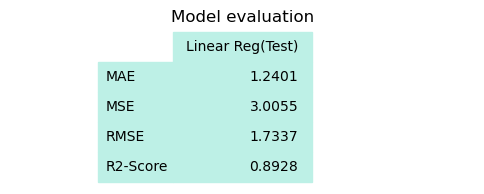

In [44]:
model_evaluate(linear_reg, X_test_scaled, y_test, 'Linear Reg(Test)')

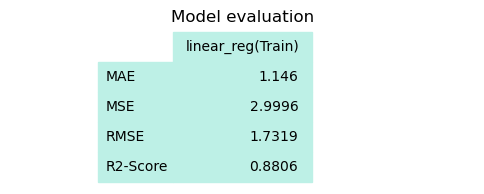

In [45]:
model_evaluate(linear_reg, X_train_scaled, y_train, 'linear_reg(Train)')

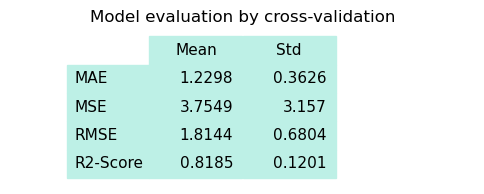

In [46]:
model_evaluate_cross(X_train_scaled, y_train, linear_reg)

<a id="assumption_Linear"></a>
# <b><span style='color:darkorange'>Step 7.3 |</span><span style='color:black'> LinearRegression assumption</span></b>

<a id="Linearity_Linear"></a>
# <b><span style='color:darkorange'>Step 7.3.1 |</span><span style='color:black'> Linearity</span></b>

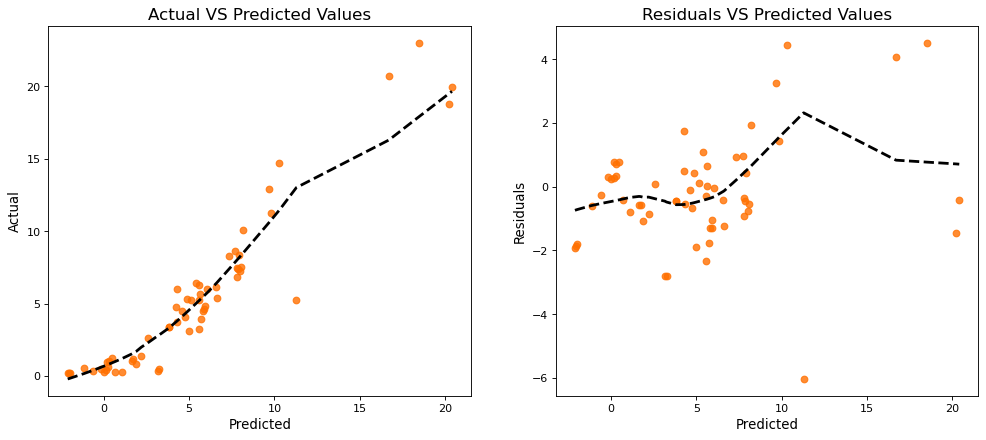

In [47]:
linear_assumption(linear_reg, X_test_scaled, y_test)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Plot analysis:**
* The inspection of the plots shows that the linearity assumption is **not satisfied**

<a id="Normality_linear"></a>
# <b><span style='color:darkorange'>Step 7.3.2 |</span><span style='color:black'> Normality of Residuals</span></b>


P-value from the test (below 0.05 generally means non-normal):   0.0004
Residuals are not normally distributed. Assumption not satisfied.


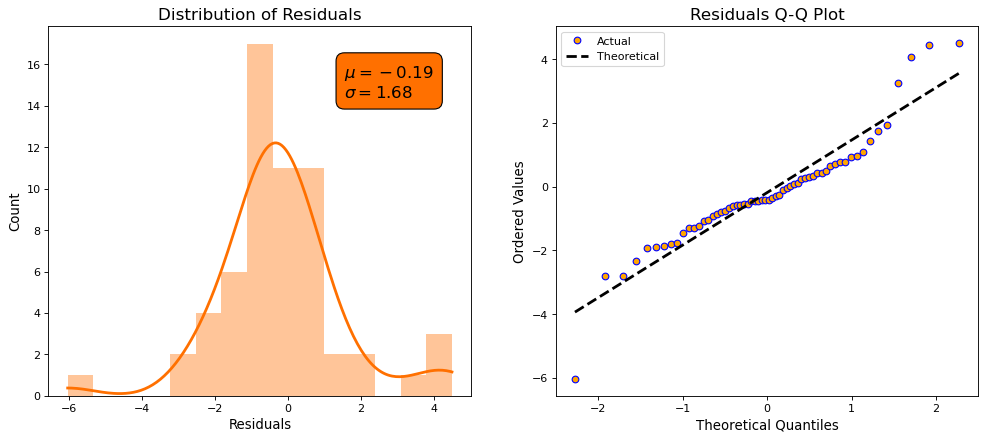

In [48]:
normal_errors_assumption(linear_reg, X_test_scaled, y_test)

<a id="Multicollinearity_linear"></a>
# <b><span style='color:darkorange'>Step 7.3.3 |</span><span style='color:black'> No Multicollinearity</span></b>

In [49]:
multicollinearity_assumption(X)

0 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption satisfied.


vif
Ago                     4.76
Present_Price           1.85
Kms_Driven              2.74
Owner                   1.07
Fuel_Type_Petrol        4.53
Seller_Type_Individual  2.03
Transmission_Manual     4.50

<a id="Autocorrelation_linear"></a>
# <b><span style='color:darkorange'>Step 7.3.4 |</span><span style='color:black'> No Autocorrelation of Residuals</span></b>

In [50]:
autocorrelation_assumption(linear_reg, X_test_scaled, y_test)

Durbin-Watson: 1.972
Little to no autocorrelation. Assumption satisfied. 



<a id="Homoscedasticity_linear"></a>
# <b><span style='color:darkorange'>Step 7.3.5 |</span><span style='color:black'> Homoscedasticity</span></b>

The black line should be flat:


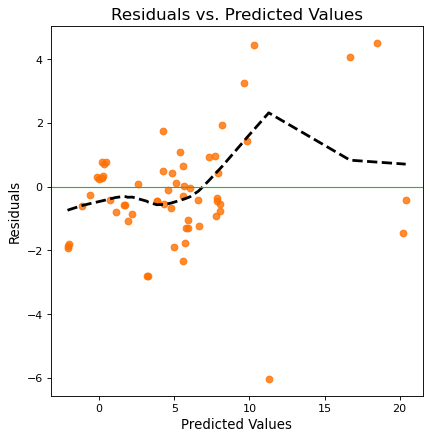

In [51]:
homoscedasticity_assumption(linear_reg, X_test_scaled, y_test)

<a id="Results_linear"></a>
# <b><span style='color:darkorange'>Step 7.4 |</span><span style='color:black'> Results Visualization</span></b>

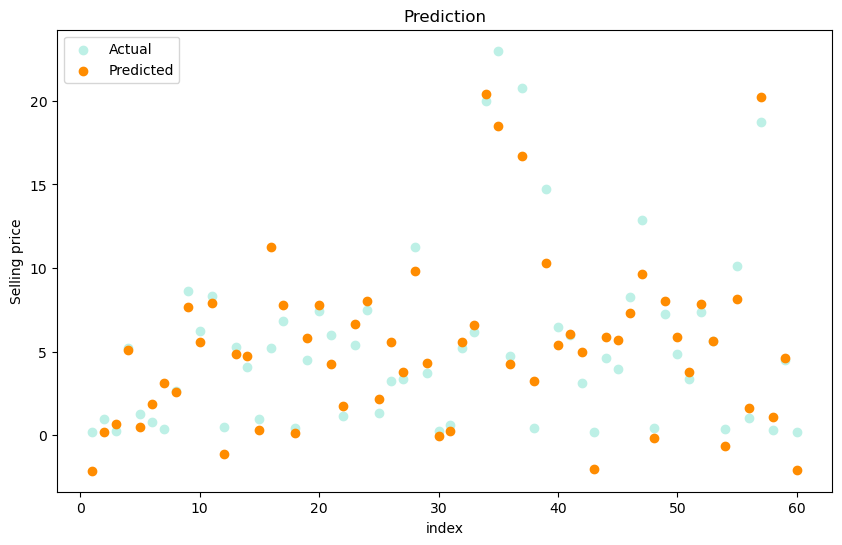

In [52]:
y_test_pred = linear_reg.predict(X_test_scaled)
compare_plot(y_test,y_test_pred)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Plot analysis:**
* The difference between the corresponding bars in the above bar plot shows the prediction error of the model on the test data. Also, out of 88 test samples, Selling_Price has been predicted negatively in 3 cases. A negative prediction for Selling_Price is disappointing

<a id="Box"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 8: Apply Box-Cox Transformation</p>

⬆️[Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **The Box-Cox transformation** is a technique used to transform non-normal dependent variables into a normal distribution. It is commonly used in linear regression models to improve the model's assumptions, such as linearity, normality, and homoscedasticity

* In order to prevent data leakage, the fitted lambda value for each feature is obtained from the training data set and then the transformation is applied to the both training and test data

<a id="Lambda"></a>
# <b><span style='color:darkorange'>Step 8.1 |</span><span style='color:black'> Transform Training Data & Save Lambda Values</span></b>

In [53]:
fitted_lambda = pd.Series(np.zeros(len(data.columns), dtype=np.float64), index=df.columns)

y_train, fitted_lambda['Selling_Price'] = stats.boxcox(y_train+1)
for col in X_train.columns:
    X_train[col], fitted_lambda[col] = stats.boxcox(X_train[col]+1)
    
fitted_lambda

Ago                       -0.007426
Selling_Price             -0.096863
Present_Price              0.015291
Kms_Driven                 0.248130
Owner                    -49.463829
Fuel_Type_Petrol           7.885143
Seller_Type_Individual    -2.747038
Transmission_Manual       13.335991
dtype: float64

<a id="Test"></a>
# <b><span style='color:darkorange'>Step 8.2 |</span><span style='color:black'> Transform Test Data Using Lambda Values</span></b>

In [54]:
y_test = stats.boxcox(y_test+1, fitted_lambda['Selling_Price'])
for col in X_test.columns:
    X_test[col] = stats.boxcox(X_test[col]+1, fitted_lambda[col])

In [55]:
y_train = pd.DataFrame(y_train, index=X_train.index, columns=['Selling_Price'])
y_test = pd.DataFrame(y_test, index=X_test.index, columns=['Selling_Price'])

X_boxcox = pd.concat([X_train, X_test])
y_boxcox = pd.concat([y_train, y_test])

df_boxcox = pd.concat([X_boxcox, y_boxcox], axis=1)
df_boxcox.sort_index(inplace=True)

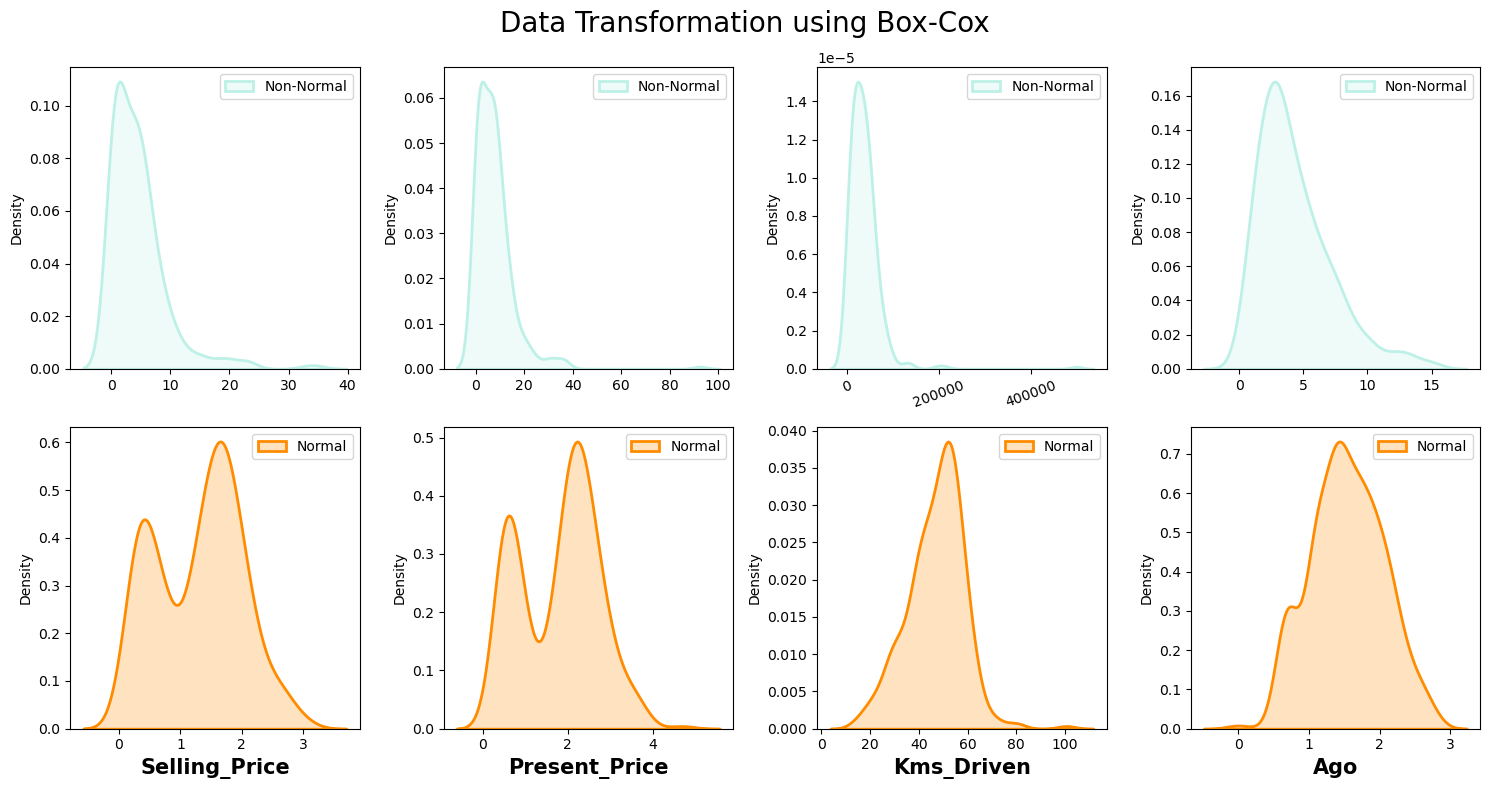

In [56]:
fig, ax = plt.subplots(2, 4, figsize=(15,8), dpi=100)
columns = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Ago']

for i,col in enumerate(columns):
    sns.kdeplot(df[col], label="Non-Normal", fill=True, color='#bdf0e6', linewidth=2, ax=ax[0,i])
    sns.kdeplot(df_boxcox[col], label="Normal", fill=True, color='#ff8c00', linewidth=2, ax=ax[1,i])  
    ax[0,i].set_xlabel('', fontsize=15)
    ax[1,i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[0,i].legend(loc="upper right")
    ax[1,i].legend(loc="upper right")

ax[0,2].tick_params(axis='x', labelrotation = 20)
plt.suptitle('Data Transformation using Box-Cox', fontsize=20)
plt.tight_layout()
plt.show()

<a id="Polynomial"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 9: Build 2nd-order Polynomial Regression</p>

⬆️[Tabel of Contents](#contents_tabel)

In [57]:
X=df_boxcox.drop('Selling_Price', axis=1)
y=df_boxcox['Selling_Price']

<a id="2nd_Polynomial"></a>
# <b><span style='color:darkorange'>Step 9.1 |</span><span style='color:black'> Create 2nd-order Polynomial Features</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **In order to overcome under-fitting and meet linear regression assumptions, first we try to increase the complexity of the model by adding all of the second-order terms of the features**

In [58]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head(5)

Ago  Present_Price  Kms_Driven  Owner  Fuel_Type_Petrol  \
0  1.599858       1.912998   46.654703    0.0         29.854794   
1  1.779892       2.398099   52.858402    0.0          0.000000   
2  0.691366       2.428156   32.099964    0.0         29.854794   
3  2.063469       1.659707   29.651453    0.0         29.854794   
4  1.599858       2.095943   52.676981    0.0          0.000000   

   Seller_Type_Individual  Transmission_Manual     Ago^2  Ago Present_Price  \
0                     0.0           775.293375  2.559547           3.060526   
1                     0.0           775.293375  3.168015           4.268357   
2                     0.0           775.293375  0.477987           1.678745   
3                     0.0           775.293375  4.257902           3.424753   
4                     0.0           775.293375  2.559547           3.353212   

   Ago Kms_Driven  ...  Owner^2  Owner Fuel_Type_Petrol  \
0       74.640915  ...      0.0                     0.0   
1       94.082242  ...      0.0                     0.0   
2       22.192833  ...      0.0                     0.0   
3       61.184840  ...      0.0                     0.0   
4       84.275708  ...      0.0                     0.0   

   Owner Seller_Type_Individual  Owner Transmission_Manual  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   

   Fuel_Type_Petrol^2  Fuel_Type_Petrol Seller_Type_Individual  \
0          891.308705                                      0.0   
1            0.000000                                      0.0   
2          891.308705                                      0.0   
3          891.308705                                      0.0   
4            0.000000                                      0.0   

   Fuel_Type_Petrol Transmission_Manual  Seller_Type_Individual^2  \
0                          23146.223736                       0.0   
1                              0.000000                       0.0   
2                          23146.223736                       0.0   
3                          23146.223736                       0.0   
4                              0.000000                       0.0   

   Seller_Type_Individual Transmission_Manual  Transmission_Manual^2  
0                                         0.0          601079.816602  
1                                         0.0          601079.816602  
2                                         0.0          601079.816602  
3                                         0.0          601079.816602  
4                                         0.0          601079.816602  

[5 rows x 35 columns]

In [59]:
poly_features_names = poly_features.get_feature_names_out(X.columns)
len(poly_features_names)

35

**Determining the train and test sets:**

In [60]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.25, random_state=1)

<a id="scaler_poly"></a>
# <b><span style='color:darkorange'>Step 9.2 |</span><span style='color:black'> Scale Data using Standard Scaler</span></b>

In [61]:
scaler = StandardScaler()
scaler.fit(X_poly_train)

X_poly_train = scaler.transform(X_poly_train)
X_poly_train = pd.DataFrame(X_poly_train, columns=poly_features_names)

X_poly_test = scaler.transform(X_poly_test)
X_poly_test = pd.DataFrame(X_poly_test, columns=poly_features_names)

In [62]:
polynomial_reg = LinearRegression()
polynomial_reg.fit(X_poly_train, y_poly_train)

LinearRegression()

<a id="evaluation_Polynomial"></a>
# <b><span style='color:darkorange'>Step 9.3 |</span><span style='color:black'> Polynomial Regression Evaluation</span></b>

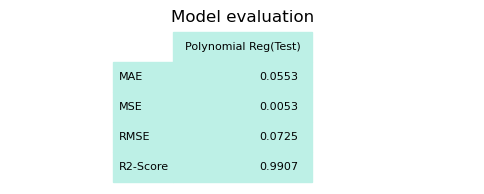

In [63]:
model_evaluate(polynomial_reg, X_poly_test, y_poly_test, 'Polynomial Reg(Test)')

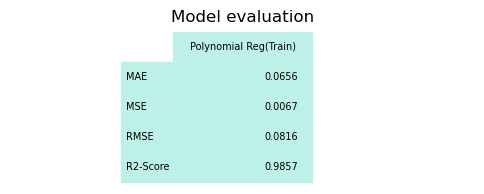

In [64]:
model_evaluate(polynomial_reg, X_poly_train, y_poly_train, 'Polynomial Reg(Train)')

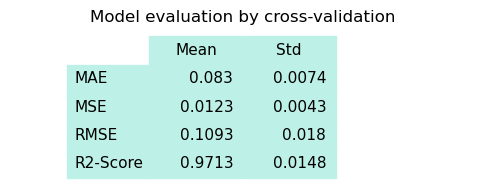

In [65]:
model_evaluate_cross(X_poly_train, y_poly_train,polynomial_reg)

<a id="assumption_Polynomial"></a>
# <b><span style='color:darkorange'>Step 9.4 |</span><span style='color:black'> Polynomial Regression assumption</span></b>

<a id="Linearity_Polynomial"></a>
# <b><span style='color:darkorange'>Step 9.4.1 |</span><span style='color:black'> Linearity</span></b>

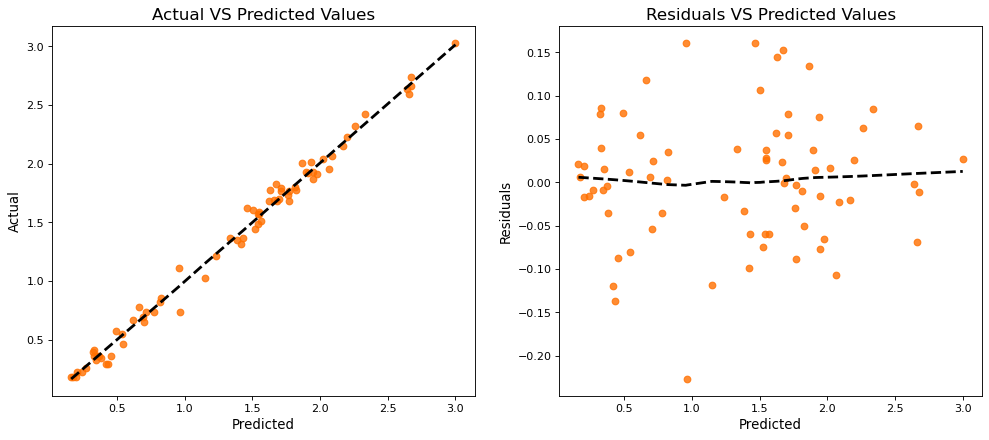

In [66]:
linear_assumption(polynomial_reg, X_poly_test, y_poly_test)

<a id="Normality_Polynomial"></a>
# <b><span style='color:darkorange'>Step 9.4.2 |</span><span style='color:black'> Normality of Residuals</span></b>


P-value from the test (below 0.05 generally means non-normal):   0.513855
Residuals are normally distributed. Assumption satisfied.


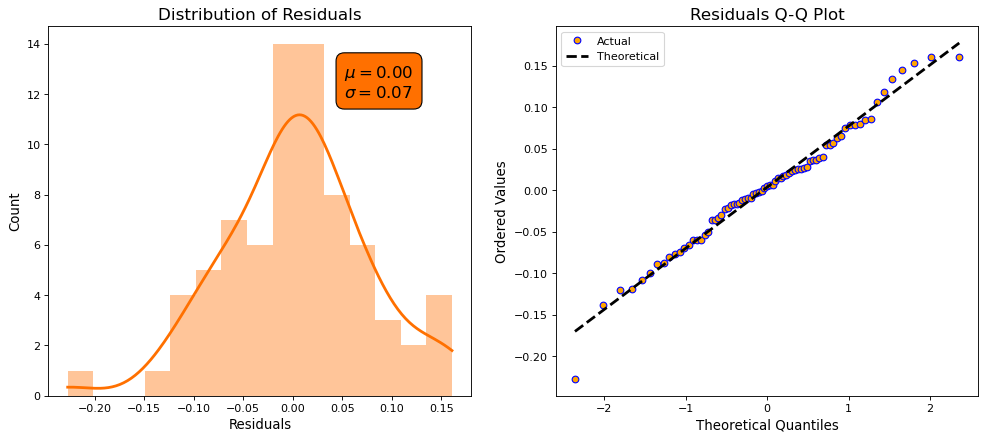

In [67]:
normal_errors_assumption(polynomial_reg, X_poly_test, y_poly_test)

<a id="Multicollinearity_Polynomial"></a>
# <b><span style='color:darkorange'>Step 9.4.3 |</span><span style='color:black'> No Multicollinearity</span></b>

In [68]:
multicollinearity_assumption(X_poly).T

35 cases of possible multicollinearity.
30 cases of definite multicollinearity.
Assumption not satisfied.


Ago  Present_Price  Kms_Driven  Owner  Fuel_Type_Petrol  \
vif  1826.12         915.83     4088.59    inf               inf   

     Seller_Type_Individual  Transmission_Manual   Ago^2  Ago Present_Price  \
vif                     inf                  inf  280.06             696.66   

     Ago Kms_Driven  ...  Owner^2  Owner Fuel_Type_Petrol  \
vif          910.79  ...      inf                   24.97   

     Owner Seller_Type_Individual  Owner Transmission_Manual  \
vif                         18.08                        inf   

     Fuel_Type_Petrol^2  Fuel_Type_Petrol Seller_Type_Individual  \
vif                 inf                                   596.64   

     Fuel_Type_Petrol Transmission_Manual  Seller_Type_Individual^2  \
vif                                104.61                       inf   

     Seller_Type_Individual Transmission_Manual  Transmission_Manual^2  
vif                                      108.79                    inf  

[1 rows x 35 columns]

<a id="Autocorrelation_Polynomial"></a>
# <b><span style='color:darkorange'>Step 9.4.4 |</span><span style='color:black'> No Autocorrelation of Residuals</span></b>

In [69]:
autocorrelation_assumption(polynomial_reg, X_poly_test, y_poly_test)

Durbin-Watson: 1.749
Little to no autocorrelation. Assumption satisfied. 



<a id="Homoscedasticity_Polynomial"></a>
# <b><span style='color:darkorange'>Step 9.4.5 |</span><span style='color:black'> Homoscedasticity</span></b>

The black line should be flat:


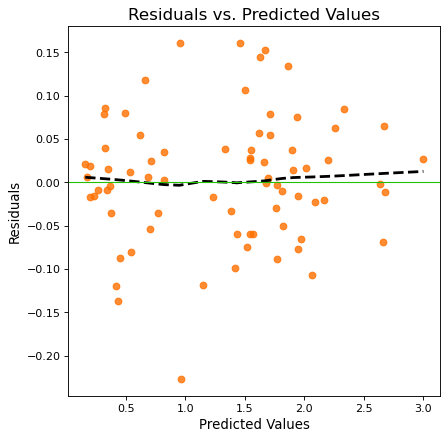

In [70]:
homoscedasticity_assumption(polynomial_reg, X_poly_test, y_poly_test)

<a id="Results_Polynomial"></a>
# <b><span style='color:darkorange'>Step 9.5 |</span><span style='color:black'> Results Visualization</span></b>

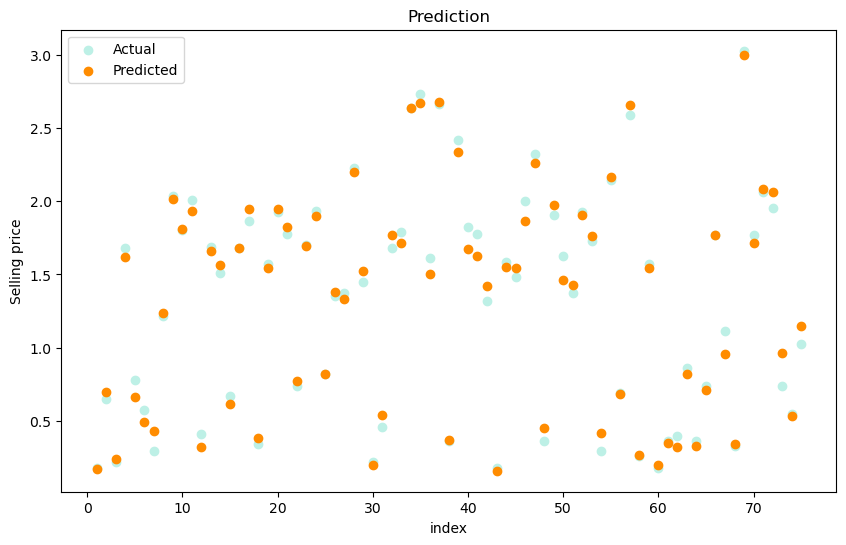

In [71]:
y_test_pred = polynomial_reg.predict(X_poly_test)
compare_plot(y_poly_test,y_test_pred)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **All the assumptions have been met except for Multicollinearity**
   - **To reduce the effects of multicollinearity in a regression model, you should:**
   - 1_Collect more data

   - 2_Drop one of the correlated variables

   - 3_Use Principal Component Analysis (PCA)

   - 4_Use regularization techniques(**Ridge,Lasso,Elastic Net**)

<a id="Ridge"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 10: Build Ridge Regression Model</p>

⬆️[Tabel of Contents](#contents_tabel)

**It is a technique in regression that is used to reduce the probability of overfitting and reduce multicollinearity effects**

**Loss function** = OLS + alpha * (the sum of the square of coefficients)

**OLS**=It shows the difference between the actual value and the predicted value, which finds the optimal coefficient of each feature for us

**alpha**=This hyperparameter determines the amount of penalty in the ridge model

**Determining the train and test sets:**

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=1) 

<a id="scaler_Ridge"></a>
# <b><span style='color:darkorange'>Step 10.1 |</span><span style='color:black'> Scale Data using Standard Scaler</span></b>

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge_cv_model = RidgeCV(alphas = alphas, cv = 3, scoring = 'neg_mean_squared_error')                        
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=3, scoring='neg_mean_squared_error')

**The alpha value that results in the smallest cross-validation MSE is:**

In [75]:
ridge_cv_model.alpha_

0.14240179342179024

<a id="evaluation_Ridge"></a>
# <b><span style='color:darkorange'>Step 10.2 |</span><span style='color:black'> Ridge Regression Evaluation</span></b>

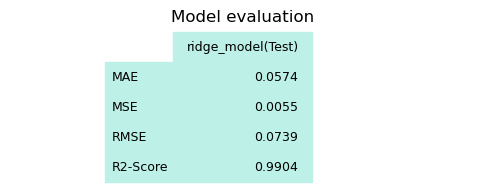

In [76]:
model_evaluate(ridge_cv_model, X_test, y_test, 'ridge_model(Test)')

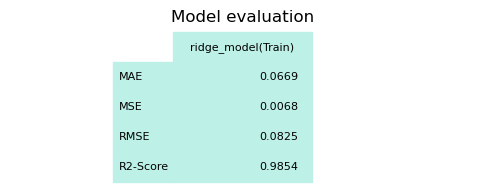

In [77]:
model_evaluate(ridge_cv_model, X_train, y_train, 'ridge_model(Train)')

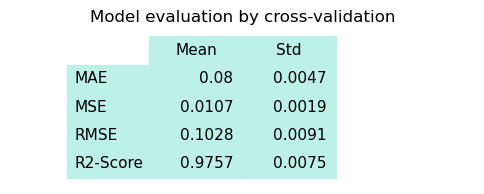

In [78]:
model_evaluate_cross(X_train, y_train, ridge_cv_model)

<a id="assumption_Ridge"></a>
# <b><span style='color:darkorange'>Step 10.3 |</span><span style='color:black'> Ridge Regression assumption</span></b>

<a id="Linearity_Ridge"></a>
# <b><span style='color:darkorange'>Step 10.3.1 |</span><span style='color:black'> Linearity</span></b>

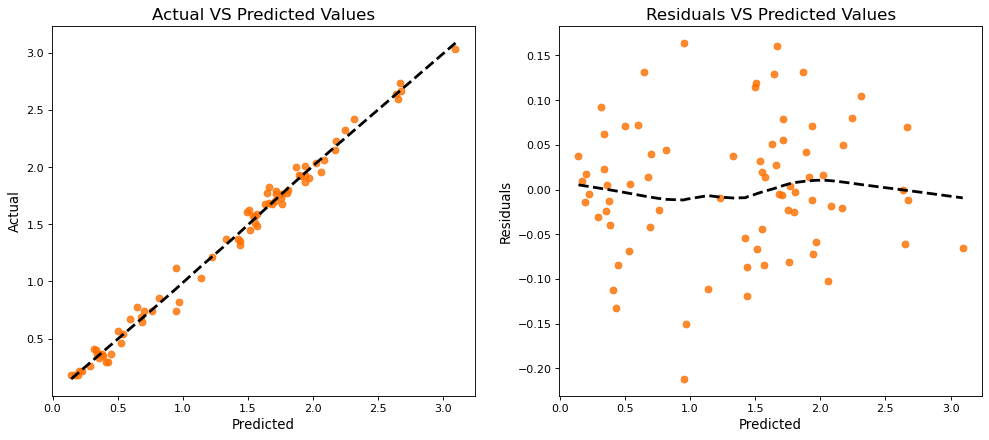

In [79]:
linear_assumption(ridge_cv_model, X_test, y_test)

<a id="Normality_Ridge"></a>
# <b><span style='color:darkorange'>Step 10.3.2 |</span><span style='color:black'> Normality of Residuals</span></b>


P-value from the test (below 0.05 generally means non-normal):   0.901308
Residuals are normally distributed. Assumption satisfied.


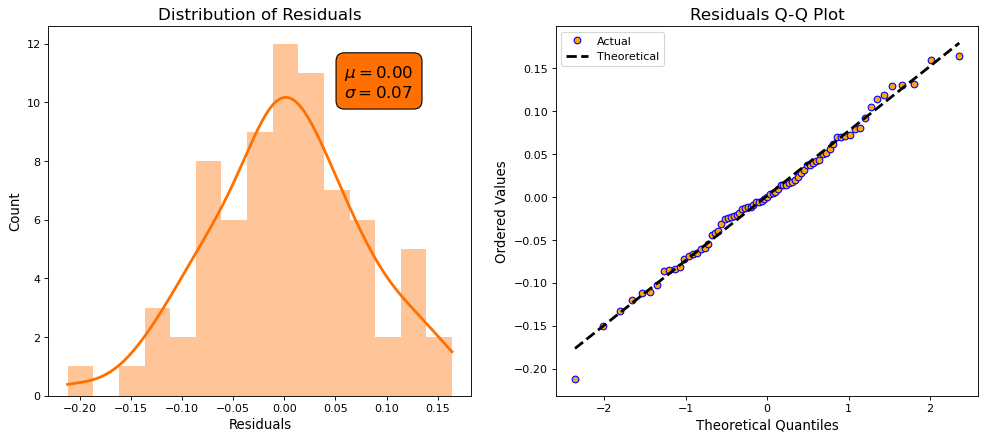

In [80]:
normal_errors_assumption(ridge_cv_model, X_test, y_test)

<a id="Multicollinearity_Ridge"></a>
# <b><span style='color:darkorange'>Step 10.3.3 |</span><span style='color:black'> No Multicollinearity</span></b>

In [81]:
multicollinearity_assumption(X_poly).T

35 cases of possible multicollinearity.
30 cases of definite multicollinearity.
Assumption not satisfied.


Ago  Present_Price  Kms_Driven  Owner  Fuel_Type_Petrol  \
vif  1826.12         915.83     4088.59    inf               inf   

     Seller_Type_Individual  Transmission_Manual   Ago^2  Ago Present_Price  \
vif                     inf                  inf  280.06             696.66   

     Ago Kms_Driven  ...  Owner^2  Owner Fuel_Type_Petrol  \
vif          910.79  ...      inf                   24.97   

     Owner Seller_Type_Individual  Owner Transmission_Manual  \
vif                         18.08                        inf   

     Fuel_Type_Petrol^2  Fuel_Type_Petrol Seller_Type_Individual  \
vif                 inf                                   596.64   

     Fuel_Type_Petrol Transmission_Manual  Seller_Type_Individual^2  \
vif                                104.61                       inf   

     Seller_Type_Individual Transmission_Manual  Transmission_Manual^2  
vif                                      108.79                    inf  

[1 rows x 35 columns]

<a id="Autocorrelation_Ridge"></a>
# <b><span style='color:darkorange'>Step 10.3.4 |</span><span style='color:black'> No Autocorrelation of Residuals</span></b>

In [82]:
autocorrelation_assumption(ridge_cv_model, X_test, y_test)

Durbin-Watson: 1.759
Little to no autocorrelation. Assumption satisfied. 



<a id="Homoscedasticity_Ridge"></a>
# <b><span style='color:darkorange'>Step 10.3.5 |</span><span style='color:black'> Homoscedasticity</span></b>

The black line should be flat:


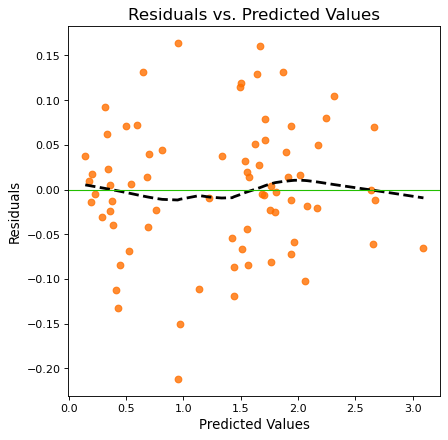

In [83]:
homoscedasticity_assumption(ridge_cv_model, X_test, y_test)

<a id="Results_Ridge"></a>
# <b><span style='color:darkorange'>Step 10.4 |</span><span style='color:black'> Results Visualization</span></b>

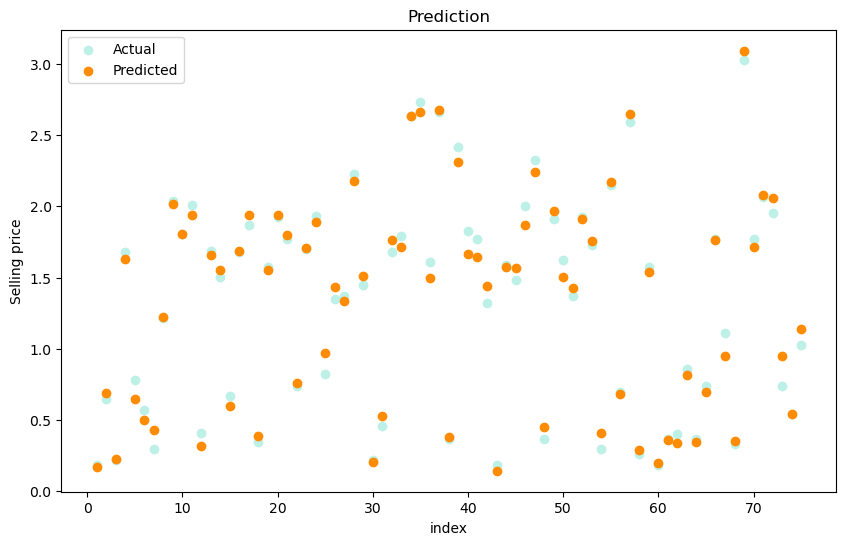

In [84]:
y_test_pred = ridge_cv_model.predict(X_test)
compare_plot(y_test,y_test_pred)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **As can be seen, the assumptions have improved slightly compared to the polynomial model.**

<a id="Lasso"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 11: Build Lasso Regression</p>

⬆️[Tabel of Contents](#contents_tabel)

   - **This technique is another approach that improves the model by reducing the coefficients of irrelevant or duplicated features to zero and reduces the risk of overfitting the model**

   - **Loss function** = OLS + alpha * (the sum of the absolute of coefficients)

In [85]:
lasso_cv_model = LassoCV(eps=0.01, n_alphas=100, max_iter=10000, cv=3)
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=3, eps=0.01, max_iter=10000)

**The alpha value that results in the smallest cross-validation error is:**

In [86]:
lasso_cv_model.alpha_

0.006439066927851465

**The Lasso Regression coefficients are:**

In [87]:
lasso_coef = lasso_cv_model.coef_
lasso_coef

array([-0.00000000e+00,  6.56128959e-01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -9.63272911e-02,
       -1.21810908e-01, -3.25978927e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -4.09754381e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -5.60446169e-04,
       -0.00000000e+00, -0.00000000e+00, -7.97487616e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

**Non-zero coefficients in the Lasso model:**

In [88]:
lasso_coef = pd.DataFrame(lasso_cv_model.coef_, index=X_poly.columns, columns=['Lasso Coef.'])
lasso_coef = lasso_coef[lasso_coef['Lasso Coef.']!=0]
lasso_coef.T

Present_Price     Ago^2  Ago Present_Price  Ago Kms_Driven  \
Lasso Coef.       0.656129 -0.096327          -0.121811        -0.00326   

             Kms_Driven Fuel_Type_Petrol  Owner Seller_Type_Individual  \
Lasso Coef.                    -0.040975                      -0.00056   

             Fuel_Type_Petrol Seller_Type_Individual  
Lasso Coef.                                -0.079749

<a id="evaluation_Lasso"></a>
# <b><span style='color:darkorange'>Step 11.1 |</span><span style='color:black'> Lasso Regression Evaluation</span></b>

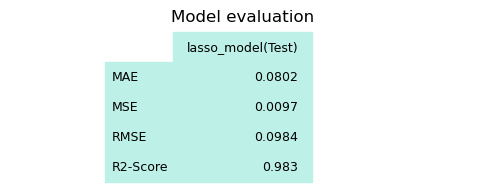

In [89]:
model_evaluate(lasso_cv_model, X_test, y_test, 'lasso_model(Test)')

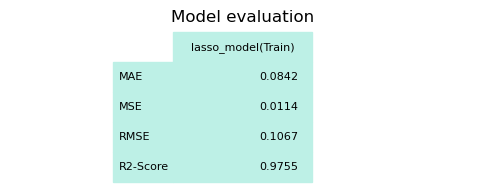

In [90]:
model_evaluate(lasso_cv_model, X_train, y_train, 'lasso_model(Train)')

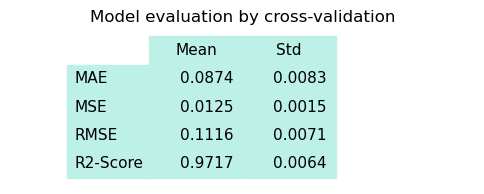

In [91]:
model_evaluate_cross(X_train, y_train,lasso_cv_model)

<a id="assumption_Lasso"></a>
# <b><span style='color:darkorange'>Step 11.2 |</span><span style='color:black'> Lasso Regression assumption</span></b>

<a id="Linearity_Lasso"></a>
# <b><span style='color:darkorange'>Step 11.2.1 |</span><span style='color:black'> Linearity</span></b>

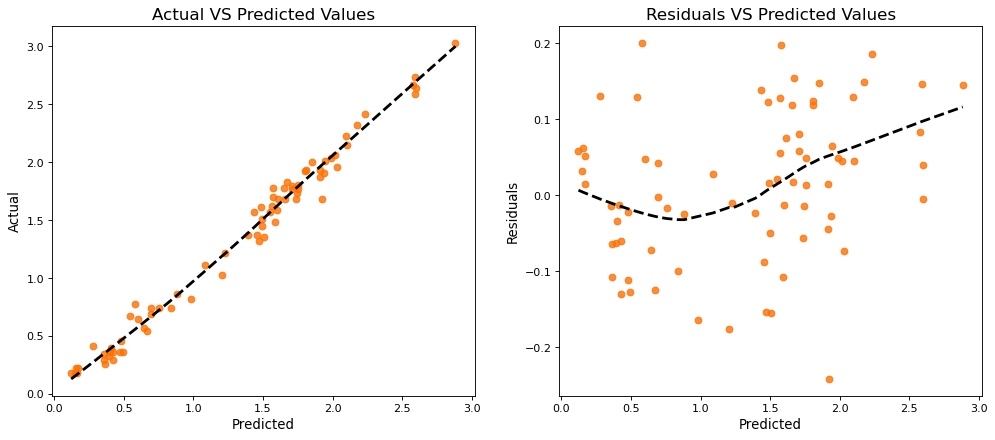

In [92]:
linear_assumption(lasso_cv_model, X_test, y_test)

<a id="Normality_Lasso"></a>
# <b><span style='color:darkorange'>Step 11.2.2 |</span><span style='color:black'> Normality of Residuals</span></b>


P-value from the test (below 0.05 generally means non-normal):   0.509473
Residuals are normally distributed. Assumption satisfied.


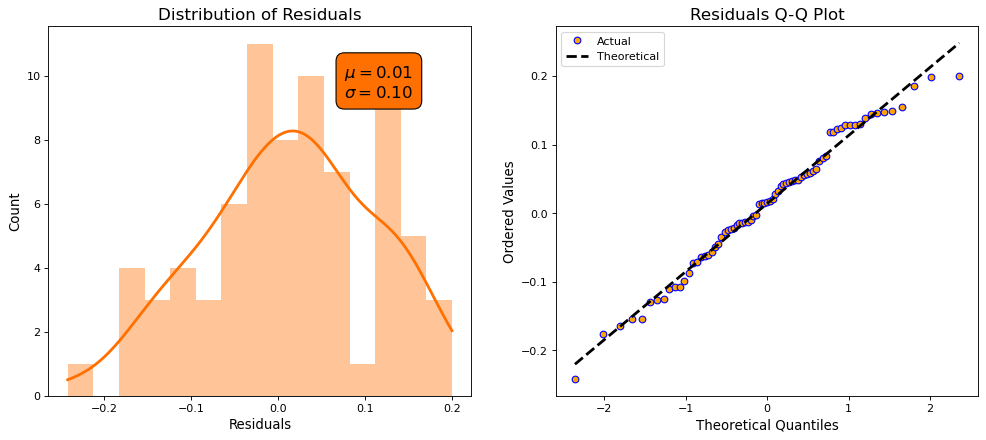

In [93]:
normal_errors_assumption(lasso_cv_model, X_test, y_test)

<a id="Multicollinearity_Lasso"></a>
# <b><span style='color:darkorange'>Step 11.2.3 |</span><span style='color:black'> No Multicollinearity</span></b>

In [94]:
multicollinearity_assumption(X_poly[lasso_coef.index]).T

4 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


Present_Price  Ago^2  Ago Present_Price  Ago Kms_Driven  \
vif          17.63  30.59              33.46           37.07   

     Kms_Driven Fuel_Type_Petrol  Owner Seller_Type_Individual  \
vif                         4.46                          1.11   

     Fuel_Type_Petrol Seller_Type_Individual  
vif                                     2.61

<a id="Autocorrelation_Lasso"></a>
# <b><span style='color:darkorange'>Step 11.2.4 |</span><span style='color:black'> No Autocorrelation of Residuals</span></b>

In [95]:
autocorrelation_assumption(lasso_cv_model, X_test, y_test)

Durbin-Watson: 1.744
Little to no autocorrelation. Assumption satisfied. 



<a id="Homoscedasticity_Lasso"></a>
# <b><span style='color:darkorange'>Step 11.3.5 |</span><span style='color:black'> Homoscedasticity</span></b>

The black line should be flat:


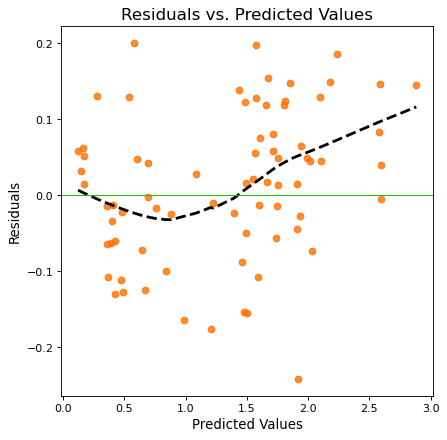

In [96]:
homoscedasticity_assumption(lasso_cv_model, X_test, y_test)

<a id="Results_Lasso"></a>
# <b><span style='color:darkorange'>Step 11.4 |</span><span style='color:black'> Results Visualization</span></b>

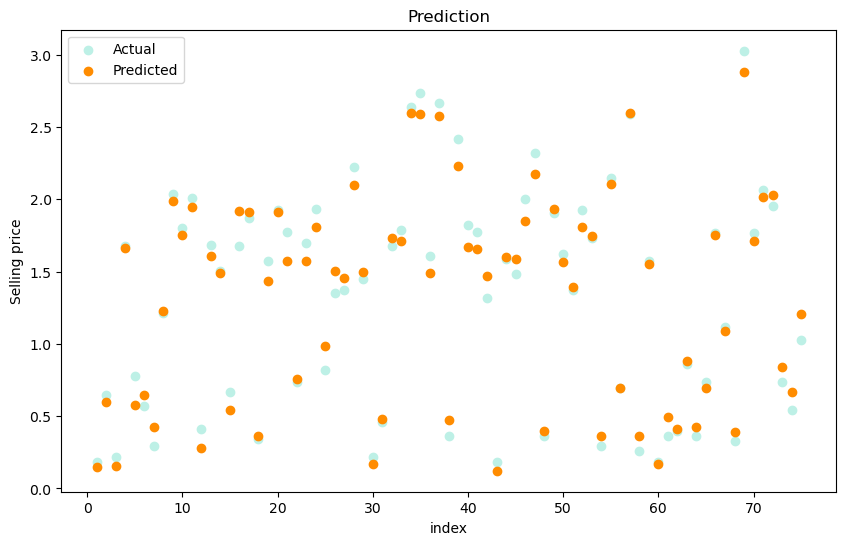

In [97]:
y_test_pred = lasso_cv_model.predict(X_test)
compare_plot(y_test,y_test_pred)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **As can be seen, the assumption of collinearity is more satisfied in the lasso than in the ridge, but the conditions in other assumptions are slightly worse than ridge**

<a id="Elastic"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 12: Elastic-Net Regression Building</p>

⬆️[Tabel of Contents](#contents_tabel)

**Another technique in regression is created by adding Ridge and Lasso to the loss function**

**Loss function=OLS +[ alpha * l1_ratio * L1-norm ] + [ 0.5 * alpha * (1 - l1_ratio) * L2-norm]**

**L1-ratio**=In Elastic Net, the "l1_ratio" hyperparameter controls the balance between the L1 (Lasso) and L2 (Ridge) penalties in the loss function

**l1_ratio** = 0 corresponds to Ridge regression, where only the L2 penalty is used.

**l1_ratio** = 1 corresponds to Lasso regression, where only the L1 penalty is used.

**0 < l1_ratio < 1 corresponds to a combination of L1 and L2 penalties, where the relative weight of the two penalties is determined by the value of l1_ratio**

In [98]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, .998, 1], 
                                eps=0.001, n_alphas=100, cv=3, max_iter=100000)

In [99]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(cv=3, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 0.998, 1],
             max_iter=100000)

**The l1-ratio value that results in the smallest cross-validation error is:**

In [100]:
elastic_cv_model.l1_ratio_

0.7

**The alpha value that results in the smallest cross-validation error is:**

In [101]:
elastic_cv_model.alpha_

0.0009198667039787805

**The ElasticNet Regression coefficients are:**

In [102]:
elastic_coef = elastic_cv_model.coef_
elastic_coef

array([ 1.92336838e-01,  7.50587944e-01,  0.00000000e+00,  0.00000000e+00,
        1.09109040e-02, -3.75738970e-02, -2.35978348e-04, -2.09862459e-01,
       -2.45662575e-01, -2.27979902e-02,  0.00000000e+00, -2.18451898e-02,
        0.00000000e+00,  2.83244534e-02, -0.00000000e+00, -0.00000000e+00,
        2.13479902e-04, -3.14202335e-02,  4.46559607e-02,  2.32740087e-02,
        0.00000000e+00, -0.00000000e+00, -2.54384543e-02,  2.56855624e-02,
       -3.59176279e-02,  0.00000000e+00,  0.00000000e+00, -1.00704301e-02,
        0.00000000e+00,  1.52782464e-02, -0.00000000e+00,  0.00000000e+00,
       -1.14820479e-01,  0.00000000e+00, -1.30269329e-02])

**Non-zero coefficients in the Elastic-Net model:**

In [103]:
elastic_coef = pd.DataFrame(elastic_cv_model.coef_, index=X_poly.columns, columns=['ElasticNet Coef.'])
elastic_coef = elastic_coef[elastic_coef['ElasticNet Coef.']!=0]
elastic_coef.T

Ago  Present_Price  Fuel_Type_Petrol  \
ElasticNet Coef.  0.192337       0.750588          0.010911   

                  Seller_Type_Individual  Transmission_Manual     Ago^2  \
ElasticNet Coef.               -0.037574            -0.000236 -0.209862   

                  Ago Present_Price  Ago Kms_Driven  Ago Fuel_Type_Petrol  \
ElasticNet Coef.          -0.245663       -0.022798             -0.021845   

                  Ago Transmission_Manual  ...  \
ElasticNet Coef.                 0.028324  ...   

                  Present_Price Fuel_Type_Petrol  \
ElasticNet Coef.                        -0.03142   

                  Present_Price Seller_Type_Individual  \
ElasticNet Coef.                              0.044656   

                  Present_Price Transmission_Manual  \
ElasticNet Coef.                           0.023274   

                  Kms_Driven Fuel_Type_Petrol  \
ElasticNet Coef.                    -0.025438   

                  Kms_Driven Seller_Type_Individual  \
ElasticNet Coef.                           0.025686   

                  Kms_Driven Transmission_Manual  \
ElasticNet Coef.                       -0.035918   

                  Owner Seller_Type_Individual  Fuel_Type_Petrol^2  \
ElasticNet Coef.                      -0.01007            0.015278   

                  Seller_Type_Individual^2  Transmission_Manual^2  
ElasticNet Coef.                  -0.11482              -0.013027  

[1 rows x 21 columns]

<a id="evaluation_Elastic"></a>
# <b><span style='color:darkorange'>Step 12.1 |</span><span style='color:black'> Elastic-Net Regression Evaluation</span></b>

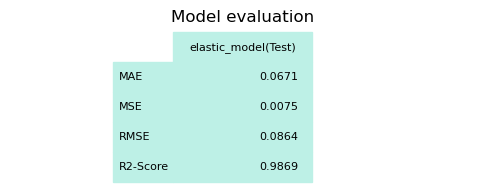

In [104]:
model_evaluate(elastic_cv_model, X_test, y_test, 'elastic_model(Test)')

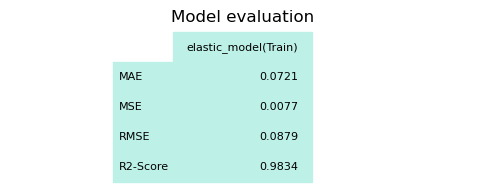

In [105]:
model_evaluate(elastic_cv_model, X_train, y_train, 'elastic_model(Train)')

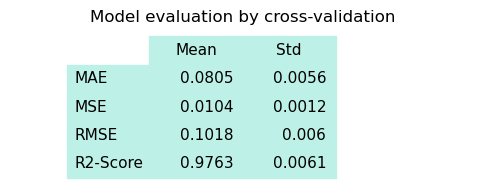

In [106]:
model_evaluate_cross(X_train, y_train, elastic_cv_model)

<a id="assumption_Elastic"></a>
# <b><span style='color:darkorange'>Step 12.2 |</span><span style='color:black'> Elastic-Net Regression assumption</span></b>

<a id="Linearity_Elastic"></a>
# <b><span style='color:darkorange'>Step 12.2.1 |</span><span style='color:black'> Linearity</span></b>

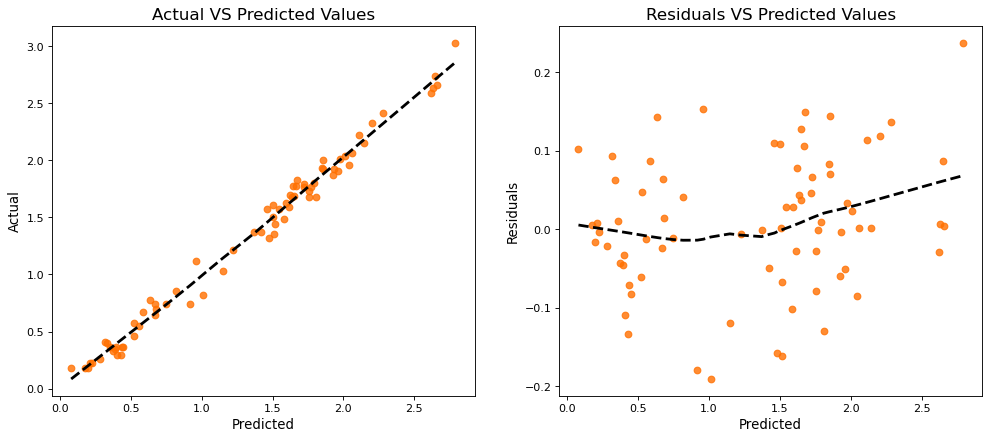

In [107]:
linear_assumption(elastic_cv_model, X_test, y_test)

<a id="Normality_Elastic"></a>
# <b><span style='color:darkorange'>Step 12.2.2 |</span><span style='color:black'> Normality of Residuals</span></b>


P-value from the test (below 0.05 generally means non-normal):   0.710436
Residuals are normally distributed. Assumption satisfied.


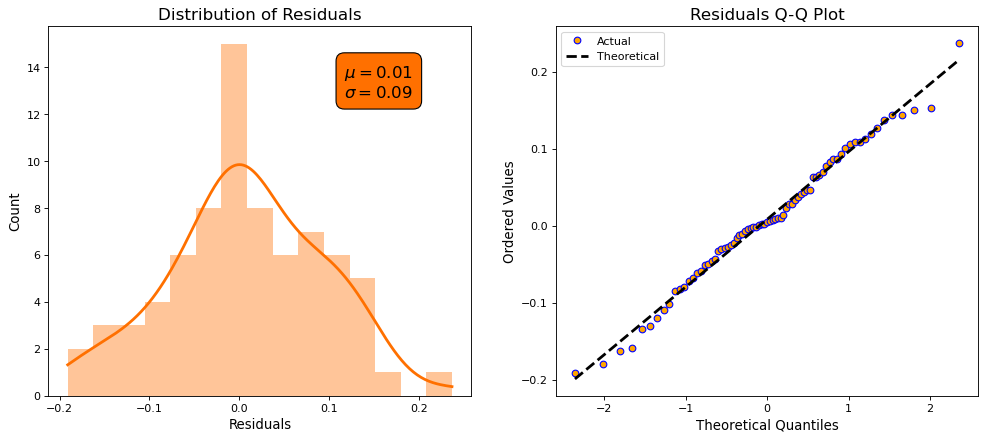

In [108]:
normal_errors_assumption(elastic_cv_model, X_test, y_test)

<a id="Multicollinearity_Elastic"></a>
# <b><span style='color:darkorange'>Step 12.2.3 |</span><span style='color:black'> No Multicollinearity</span></b>

In [109]:
multicollinearity_assumption(X_poly[elastic_coef.index]).T

18 cases of possible multicollinearity.
12 cases of definite multicollinearity.
Assumption not satisfied.


Ago  Present_Price  Fuel_Type_Petrol  Seller_Type_Individual  \
vif  292.93          46.48               inf                     inf   

     Transmission_Manual   Ago^2  Ago Present_Price  Ago Kms_Driven  \
vif                  inf  152.58              60.66          235.56   

     Ago Fuel_Type_Petrol  Ago Transmission_Manual  ...  \
vif                144.97                    91.57  ...   

     Present_Price Fuel_Type_Petrol  Present_Price Seller_Type_Individual  \
vif                           62.55                                  6.97   

     Present_Price Transmission_Manual  Kms_Driven Fuel_Type_Petrol  \
vif                               32.5                       275.61   

     Kms_Driven Seller_Type_Individual  Kms_Driven Transmission_Manual  \
vif                               40.9                          141.46   

     Owner Seller_Type_Individual  Fuel_Type_Petrol^2  \
vif                          1.28                 inf   

     Seller_Type_Individual^2  Transmission_Manual^2  
vif                       inf                    inf  

[1 rows x 21 columns]

<a id="Autocorrelation_Elastic"></a>
# <b><span style='color:darkorange'>Step 12.2.4 |</span><span style='color:black'> No Autocorrelation of Residuals</span></b>

In [110]:
autocorrelation_assumption(elastic_cv_model, X_test, y_test)

Durbin-Watson: 1.875
Little to no autocorrelation. Assumption satisfied. 



<a id="Homoscedasticity_Elastic"></a>
# <b><span style='color:darkorange'>Step 12.2.5 |</span><span style='color:black'> Homoscedasticity</span></b>

The black line should be flat:


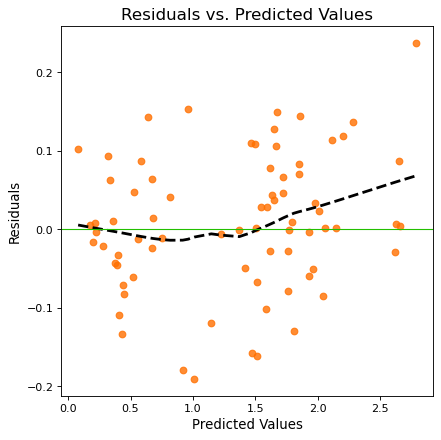

In [111]:
homoscedasticity_assumption(elastic_cv_model, X_test, y_test)

<a id="Results_Elastic"></a>
# <b><span style='color:darkorange'>Step 12.3 |</span><span style='color:black'> Results Visualization</span></b>

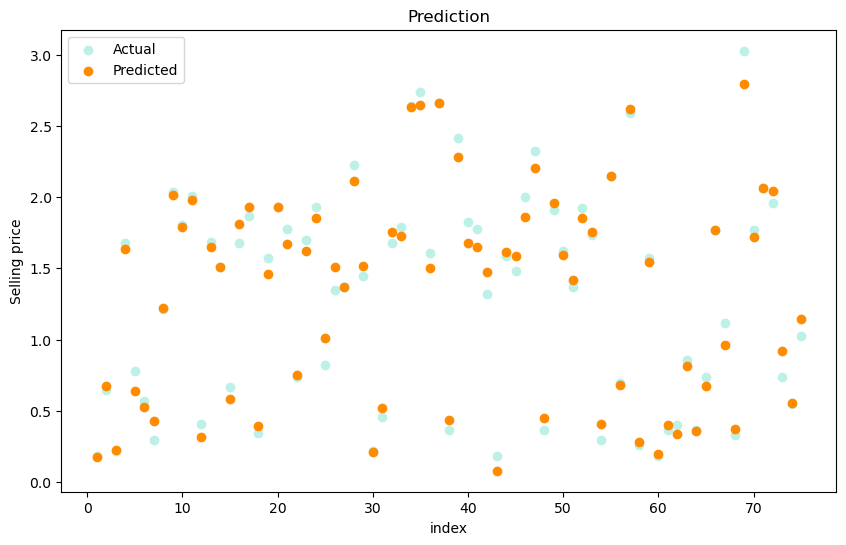

In [112]:
y_test_pred = elastic_cv_model.predict(X_test)
compare_plot(y_test,y_test_pred)

<a id="higher"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 13: Building models with higher orders</p>

⬆️[Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **The following function produces high-order features from the 2nd order to the desired order and trains and evaluates regularized models on the set of features of each order and then it returns the r2-score and the number of features used by each regularized model in the form of two separate dataframes**

In [113]:
def poly_check(degree, X, y):
    ridge_scores = []
    lasso_scores = []
    elasticnet_scores = []
    
    ridge_features = []
    lasso_features = []
    elasticnet_features = []
    
    for d in range(2,degree+1):
        poly_features = PolynomialFeatures(degree=d, include_bias=False)
        X_poly = poly_features.fit_transform(X)
        X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=1)

        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Ridge
        alphas = 10**np.linspace(10,-2,100)*0.5
        ridge_cv = RidgeCV(alphas = alphas, cv=3, scoring = 'neg_mean_squared_error')
        ridge_cv.fit(X_train, y_train)
        ridge_scores.append(ridge_cv.score(X_test,y_test))
        ridge_cols = ridge_cv.coef_[ridge_cv.coef_!=0].shape[0]
        ridge_features.append(ridge_cols)
        
        # Lasso
        lasso_cv = LassoCV(eps=0.01, n_alphas=100, max_iter=10000, cv=3)
        lasso_cv.fit(X_train, y_train)
        lasso_scores.append(lasso_cv.score(X_test,y_test))
        lasso_cols = lasso_cv.coef_[lasso_cv.coef_!=0].shape[0]
        lasso_features.append(lasso_cols)
        
        # Elastic-Net
        elastic_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, cv=3, max_iter=100000)
        elastic_cv.fit(X_train, y_train)
        elasticnet_scores.append(elastic_cv.score(X_test,y_test))
        elasticnet_cols = elastic_cv.coef_[elastic_cv.coef_!=0].shape[0]
        elasticnet_features.append(elasticnet_cols)
           
    scores = pd.DataFrame({'Ridge':ridge_scores, 'Lasso':lasso_scores, 'ElasticNet':elasticnet_scores}).round(4)
    scores = pd.concat([pd.DataFrame({'Degree':range(2,degree+1)}), scores], axis=1)  
    feature_num = pd.DataFrame({'Ridge':ridge_features, 'Lasso':lasso_features, 'ElasticNet':elasticnet_features})
    feature_num = pd.concat([pd.DataFrame({'Degree':range(2,degree+1)}), feature_num], axis=1)
    return scores, feature_num

In [114]:
scores, feature_num = poly_check(6, X, y)

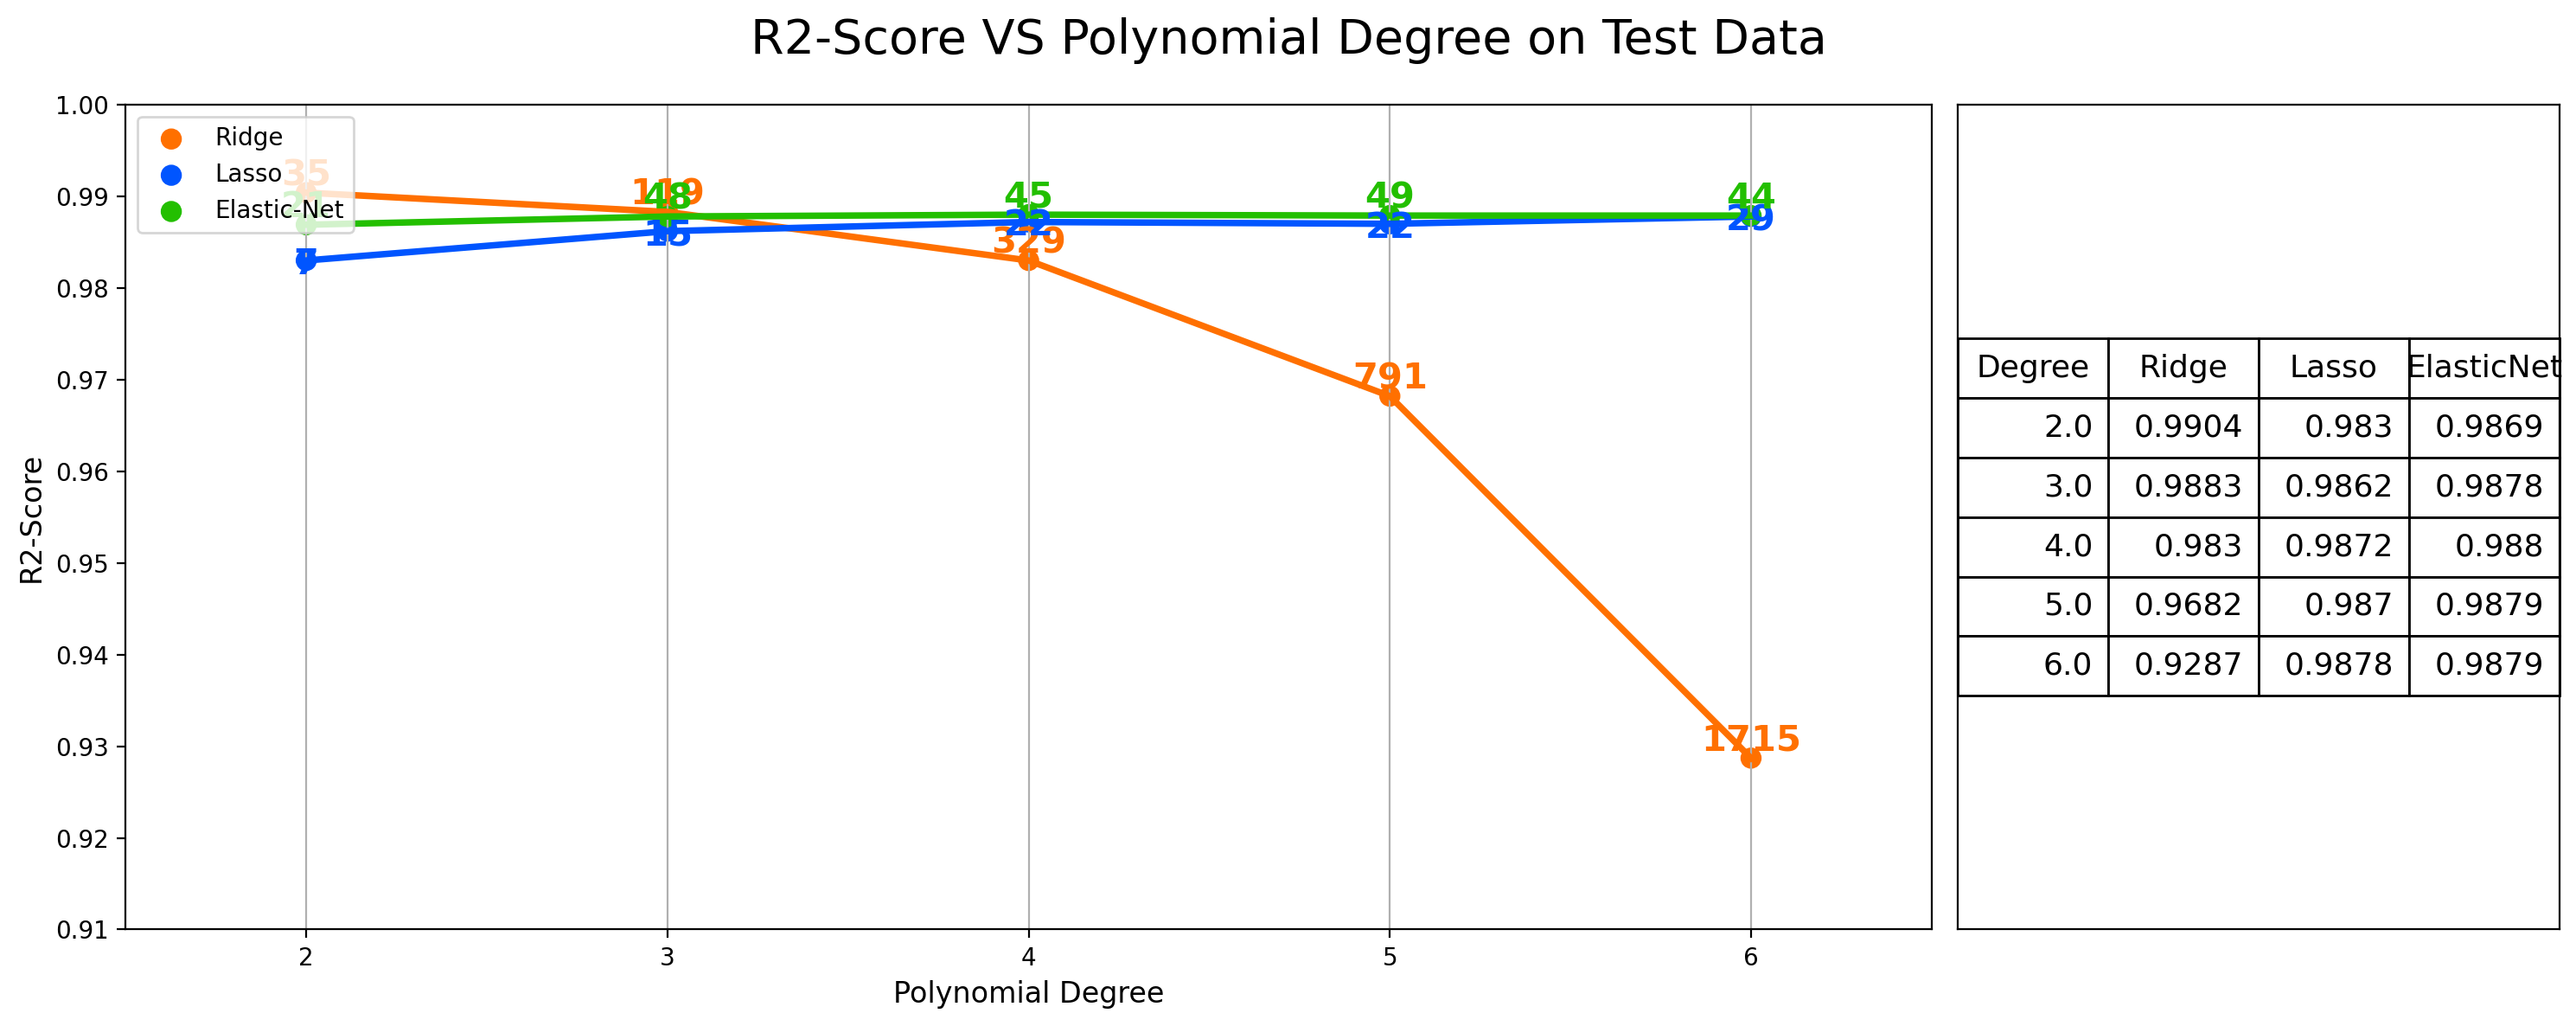

In [115]:
# Plot1
fig, ax = plt.subplots(1, 2, figsize=(15,6), dpi=200, gridspec_kw={'width_ratios': [3, 1]})

sns.pointplot(x=scores['Degree'], y=scores['Ridge'], color='#ff7000', label='Ridge', ax=ax[0])
sns.pointplot(x=scores['Degree'], y=scores['Lasso'], color='#0055ff', label='Lasso', ax=ax[0])
sns.pointplot(x=scores['Degree'], y=scores['ElasticNet'], color='#23bf00', label='Elastic-Net', ax=ax[0])
ax[0].set_xlabel('Polynomial Degree', fontsize=12)
ax[0].set_ylabel('R2-Score', fontsize=12)
ax[0].legend(loc='upper left')
ax[0].grid(axis='x')
ax[0].set_ylim([0.91, 1.00])

# Annotate Points
for i,j,f in zip(scores['Degree']-2, scores['Ridge'], feature_num['Ridge']):
    ax[0].text(i, j+0.0008, str(f), ha='center', color='#ff7000', weight='bold', fontsize=15)

for i,j,f in zip(scores['Degree']-2, scores['Lasso'], feature_num['Lasso']):
    ax[0].text(i, j-0.0015, str(f), ha='center', color='#0055ff', weight='bold', fontsize=15)
    
for i,j,f in zip(scores['Degree']-2, scores['ElasticNet'], feature_num['ElasticNet']):
    ax[0].text(i, j+0.0008, str(f), ha='center', color='#23bf00', weight='bold', fontsize=15)
    
# Plot2    
table = ax[1].table(cellText=scores.values, colLabels=scores.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(13)
ax[1].set_xticks([])
ax[1].set_yticks([])
table.scale(1, 2)

plt.suptitle('R2-Score VS Polynomial Degree on Test Data', fontsize=20)
plt.tight_layout()
plt.show()

<a id="Final"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:40px 50px; padding:10px">Step 14: Final Regression model Building</p>

⬆️[Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* We examined multiple models and ultimately discovered that when the model reaches a third degree in elastic net, it not only provides higher accuracy but also better satisfies most of the assumptions of regression compared to other models.

**Therefore, let's proceed and build this model as our final regression model:**

In [116]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head()

Ago  Present_Price  Kms_Driven  Owner  Fuel_Type_Petrol  \
0  1.599858       1.912998   46.654703    0.0         29.854794   
1  1.779892       2.398099   52.858402    0.0          0.000000   
2  0.691366       2.428156   32.099964    0.0         29.854794   
3  2.063469       1.659707   29.651453    0.0         29.854794   
4  1.599858       2.095943   52.676981    0.0          0.000000   

   Seller_Type_Individual  Transmission_Manual     Ago^2  Ago Present_Price  \
0                     0.0           775.293375  2.559547           3.060526   
1                     0.0           775.293375  3.168015           4.268357   
2                     0.0           775.293375  0.477987           1.678745   
3                     0.0           775.293375  4.257902           3.424753   
4                     0.0           775.293375  2.559547           3.353212   

   Ago Kms_Driven  ...  Fuel_Type_Petrol^3  \
0       74.640915  ...        26609.837504   
1       94.082242  ...            0.000000   
2       22.192833  ...        26609.837504   
3       61.184840  ...        26609.837504   
4       84.275708  ...            0.000000   

   Fuel_Type_Petrol^2 Seller_Type_Individual  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Fuel_Type_Petrol^2 Transmission_Manual  \
0                           691025.734023   
1                                0.000000   
2                           691025.734023   
3                           691025.734023   
4                                0.000000   

   Fuel_Type_Petrol Seller_Type_Individual^2  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Fuel_Type_Petrol Seller_Type_Individual Transmission_Manual  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   Fuel_Type_Petrol Transmission_Manual^2  Seller_Type_Individual^3  \
0                            1.794511e+07                       0.0   
1                            0.000000e+00                       0.0   
2                            1.794511e+07                       0.0   
3                            1.794511e+07                       0.0   
4                            0.000000e+00                       0.0   

   Seller_Type_Individual^2 Transmission_Manual  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Seller_Type_Individual Transmission_Manual^2  Transmission_Manual^3  
0                                           0.0           4.660132e+08  
1                                           0.0           4.660132e+08  
2                                           0.0           4.660132e+08  
3                                           0.0           4.660132e+08  
4                                           0.0           4.660132e+08  

[5 rows x 119 columns]

<a id="VIF_Final"></a>
# <b><span style='color:darkorange'>Step 14.1 |</span><span style='color:black'> Drop Features with High Values of VIF</span></b>

__To deal with multicollinearity we should iteratively drop features with high values of VIF:__

In [117]:
def vif_calculator(X):
    '''
    This function calculates VIF values of predictors
    '''
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

In [118]:
for i in range(X_poly.shape[0]):
    df_vif = vif_calculator(X_poly)[::-1]
    df_vif.reset_index(inplace=True)
    if df_vif['vif'].max() > 99:
        idx = df_vif['vif'].argmax()
        col = df_vif.iloc[idx]['index']
        X_poly.drop(col, axis=1, inplace=True)

In [119]:
multicollinearity_assumption(X_poly).T

26 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


Present_Price  Fuel_Type_Petrol  Kms_Driven Owner  \
vif          45.55             65.19             77.74   

     Kms_Driven Seller_Type_Individual  Owner Fuel_Type_Petrol  \
vif                              72.63                   12.43   

     Owner Seller_Type_Individual  Fuel_Type_Petrol Seller_Type_Individual  \
vif                         10.81                                     77.5   

     Seller_Type_Individual Transmission_Manual  Ago^3  Ago^2 Owner  ...  \
vif                                       83.57  25.94        24.62  ...   

     Present_Price^3  Present_Price^2 Fuel_Type_Petrol  \
vif            21.47                             26.96   

     Present_Price^2 Seller_Type_Individual  \
vif                                    16.9   

     Present_Price^2 Transmission_Manual  Present_Price Kms_Driven^2  \
vif                                29.49                       68.98   

     Present_Price Fuel_Type_Petrol Transmission_Manual  \
vif                                              15.18    

     Present_Price Seller_Type_Individual Transmission_Manual  Kms_Driven^3  \
vif                                              20.49                49.34   

     Kms_Driven^2 Fuel_Type_Petrol  Kms_Driven^2 Transmission_Manual  
vif                          82.16                             38.73  

[1 rows x 26 columns]

**Split Dataset to Train & Test Sets:**

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=1)

<a id="Scale_Final"></a>
# <b><span style='color:darkorange'>Step 14.2 |</span><span style='color:black'> Scale Data using Standard Scaler</span></b>

In [121]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Build Elastic-Net Regression Model:**

In [122]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, .998, 1], 
                                eps=0.001, n_alphas=100, cv=3, max_iter=100000)
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(cv=3, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 0.998, 1],
             max_iter=100000)

**The alpha value that results in the smallest cross-validation MSE is:**

In [123]:
elastic_coef = elastic_cv_model.coef_
elastic_coef

array([ 8.18929765e-01,  6.74269339e-02, -2.72905191e-04, -3.40584315e-02,
       -0.00000000e+00, -1.03967993e-02, -7.35915448e-02, -0.00000000e+00,
       -1.47242264e-01,  1.45683486e-03,  1.00671018e-01,  0.00000000e+00,
       -8.18212549e-02, -0.00000000e+00, -0.00000000e+00, -2.08832268e-02,
       -4.94743209e-02, -5.22282357e-02,  3.16706948e-03, -4.14030338e-03,
       -1.00793545e-01, -5.13925236e-03,  1.16095261e-03,  1.18328798e-02,
        0.00000000e+00, -0.00000000e+00])

In [124]:
elastic_coef = pd.DataFrame(elastic_cv_model.coef_, index=X_poly.columns, columns=['ElasticNet Coef.'])
elastic_coef = elastic_coef[elastic_coef['ElasticNet Coef.']!=0]
elastic_coef.T

Present_Price  Fuel_Type_Petrol  Kms_Driven Owner  \
ElasticNet Coef.        0.81893          0.067427         -0.000273   

                  Kms_Driven Seller_Type_Individual  \
ElasticNet Coef.                          -0.034058   

                  Owner Seller_Type_Individual  \
ElasticNet Coef.                     -0.010397   

                  Fuel_Type_Petrol Seller_Type_Individual     Ago^3  \
ElasticNet Coef.                                -0.073592 -0.147242   

                  Ago^2 Owner  Ago^2 Seller_Type_Individual  \
ElasticNet Coef.     0.001457                      0.100671   

                  Ago Present_Price Fuel_Type_Petrol  \
ElasticNet Coef.                           -0.081821   

                  Ago Seller_Type_Individual Transmission_Manual  \
ElasticNet Coef.                                       -0.020883   

                  Present_Price^3  Present_Price^2 Fuel_Type_Petrol  \
ElasticNet Coef.        -0.049474                         -0.052228   

                  Present_Price^2 Seller_Type_Individual  \
ElasticNet Coef.                                0.003167   

                  Present_Price^2 Transmission_Manual  \
ElasticNet Coef.                             -0.00414   

                  Present_Price Kms_Driven^2  \
ElasticNet Coef.                   -0.100794   

                  Present_Price Fuel_Type_Petrol Transmission_Manual  \
ElasticNet Coef.                                          -0.005139    

                  Present_Price Seller_Type_Individual Transmission_Manual  \
ElasticNet Coef.                                           0.001161          

                  Kms_Driven^3  
ElasticNet Coef.      0.011833

<a id="Evaluation_Final"></a>
# <b><span style='color:darkorange'>Step 14.3 |</span><span style='color:black'> Final (ElasticNet**3) Regression model Evaluation</span></b>

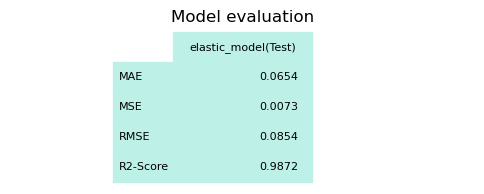

In [125]:
model_evaluate(elastic_cv_model, X_test, y_test, 'elastic_model(Test)')

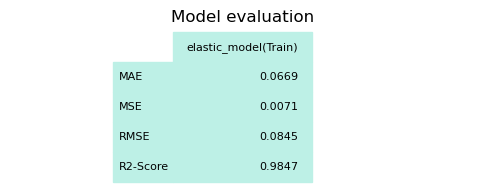

In [126]:
model_evaluate(elastic_cv_model, X_train, y_train, 'elastic_model(Train)')

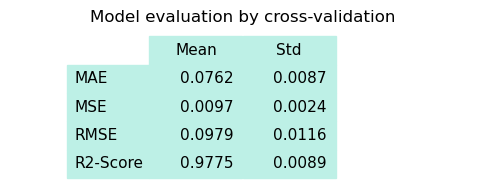

In [127]:
model_evaluate_cross(X_train, y_train, elastic_cv_model)

<a id="assumption_Final"></a>
# <b><span style='color:darkorange'>Step 14.4 |</span><span style='color:black'> Final Regression assumption</span></b>

<a id="Linearity_Final"></a>
# <b><span style='color:darkorange'>Step 14.4.1 |</span><span style='color:black'> Linearity</span></b>

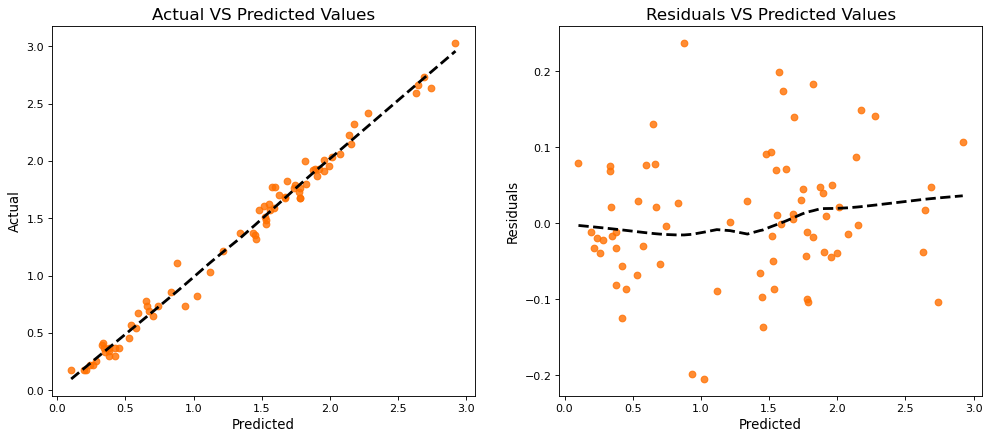

In [128]:
linear_assumption(elastic_cv_model, X_test, y_test)

<a id="Normality_Final"></a>
# <b><span style='color:darkorange'>Step 14.4.2 |</span><span style='color:black'> Normality of Residuals</span></b>


P-value from the test (below 0.05 generally means non-normal):   0.428906
Residuals are normally distributed. Assumption satisfied.


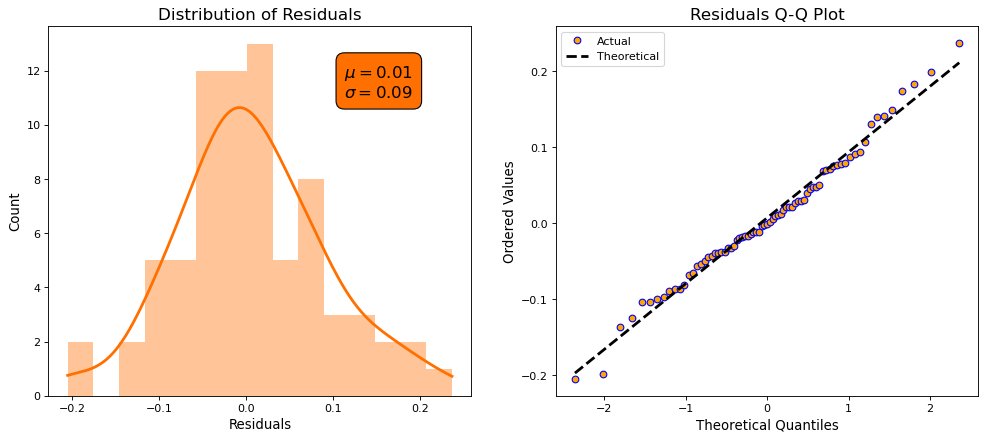

In [129]:
normal_errors_assumption(elastic_cv_model, X_test, y_test)

<a id="Multicollinearity_Final"></a>
# <b><span style='color:darkorange'>Step 14.4.3 |</span><span style='color:black'> No Multicollinearity</span></b>

In [130]:
multicollinearity_assumption(X_poly[elastic_coef.index]).T

16 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


Present_Price  Fuel_Type_Petrol  Kms_Driven Owner  \
vif          33.01             43.33             10.92   

     Kms_Driven Seller_Type_Individual  Owner Seller_Type_Individual  \
vif                              55.56                           3.8   

     Fuel_Type_Petrol Seller_Type_Individual  Ago^3  Ago^2 Owner  \
vif                                    46.37  15.02        15.95   

     Ago^2 Seller_Type_Individual  Ago Present_Price Fuel_Type_Petrol  \
vif                         16.87                               34.22   

     Ago Seller_Type_Individual Transmission_Manual  Present_Price^3  \
vif                                           24.48            11.44   

     Present_Price^2 Fuel_Type_Petrol  Present_Price^2 Seller_Type_Individual  \
vif                             20.89                                    4.55   

     Present_Price^2 Transmission_Manual  Present_Price Kms_Driven^2  \
vif                                 7.78                       51.02   

     Present_Price Fuel_Type_Petrol Transmission_Manual  \
vif                                              12.91    

     Present_Price Seller_Type_Individual Transmission_Manual  Kms_Driven^3  
vif                                              12.13                27.54

<a id="Autocorrelation_Final"></a>
# <b><span style='color:darkorange'>Step 14.4.4 |</span><span style='color:black'> No Autocorrelation of Residuals</span></b>

In [131]:
autocorrelation_assumption(elastic_cv_model, X_test, y_test)

Durbin-Watson: 1.879
Little to no autocorrelation. Assumption satisfied. 



<a id="Homoscedasticity_Final"></a>
# <b><span style='color:darkorange'>Step 14.4.5 |</span><span style='color:black'> Homoscedasticity</span></b>

The black line should be flat:


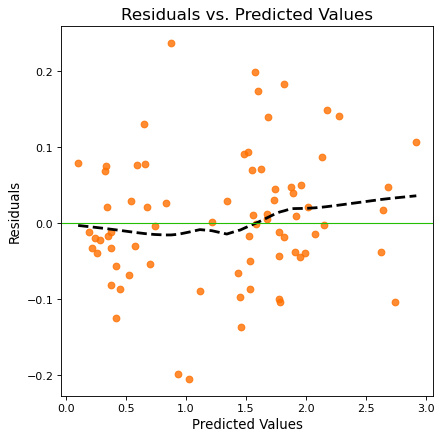

In [132]:
homoscedasticity_assumption(elastic_cv_model, X_test, y_test)

<a id="Results_Final"></a>
# <b><span style='color:darkorange'>Step 14.4.6 |</span><span style='color:black'> Results Visualization</span></b>

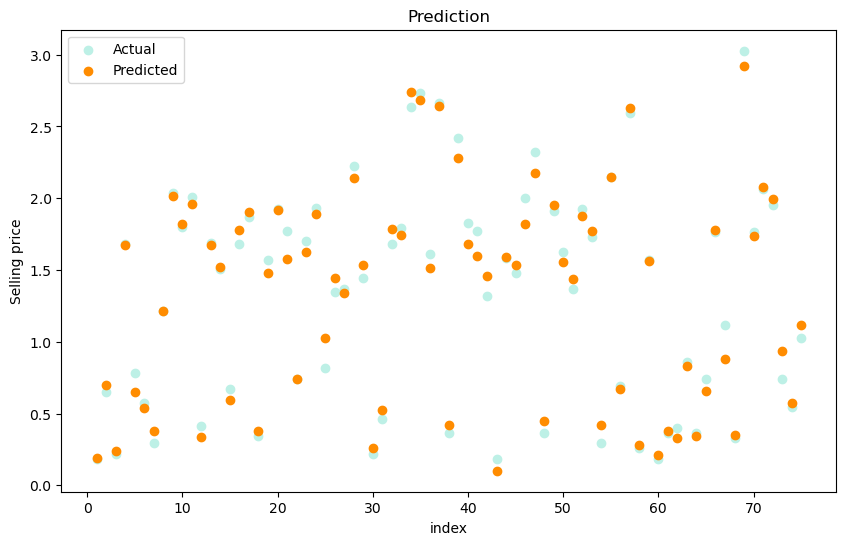

In [133]:
y_test_pred = elastic_cv_model.predict(X_test)
compare_plot(y_test,y_test_pred)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Best Model🏆</font></h2> 

* **Name Model:** elastic_net ( elastic_cv_model )
* **R2 score:** Test Data: 0.9872 _ Train Data: 0.9847
* **Overfitting:**  No
* **Cross Validation R2 score:** 
    - **CV Mean:** 0.9775	
    - **Std:** 0.0089
* **Regression assumption:**
    - As you can see, this model has outperformed other models and been able to satisfy the assumptions of regression

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Thank you for taking the time to consider this matter**
* The programmer of this project: **Amir Salmasi**

<h2 align="left"><font color=#ff8c00>Best Regards🙏</font></h2>